# Анализ финансовых рядов.
Самой популярной криптовалютой является Bitcoin, стоимость которого уже превысила $15k. Однако, в мире существуют еще несколько тысяч альтернативных криптовалют, большая часть из которых ничего особенного из себя не представляют и даже динамика их цен совпадает с флагманским биткоином. 
- Задача найти криптовалюты, которые не будут попадать в кластер биткоина на разных временных промежутках

## За последние 30 дней с дневной частотой

Установка библиотеки cryptocompare

In [4]:
import pandas as pd
import numpy as np
import time
from tqdm.autonotebook import tqdm
import random

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import cryptocompare

/Users/alsukurmakaeva/miniconda3/envs/dqual_alpha_nlp/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [5]:
name_tikers_all = cryptocompare.get_coin_list(format=True)

In [6]:
name_tikers_all

['BTCD',
 'CRAIG',
 'XBS',
 'XPY',
 'PRC',
 'YBC',
 'DANK',
 'GIVE',
 'KOBO',
 'DT',
 'CETI',
 'SUP',
 'XPD',
 'GEO',
 'CHASH',
 'NXTI',
 'WOLF',
 'XDP',
 '2015',
 '42',
 'AC',
 'ACOIN',
 'AERO',
 'ALF',
 'AEGIS',
 'AMERICANCOIN',
 'ALIEN',
 'ARCH',
 'AURORAC',
 'AXR',
 'BETACOIN',
 'BEAN',
 'BLU',
 'BOST',
 'BQC',
 'MOONC',
 'ZET',
 'SXC',
 'QTL',
 'ENRG',
 'QRK',
 'RIC',
 'DGC',
 'LIMX',
 'BTB',
 'CAIX',
 'BTMK',
 'BUK',
 'CACH',
 'CANN',
 'CAP',
 'CASH',
 'CATC',
 'CCN',
 'CINNI',
 'CXC',
 'CLAM',
 'CLR',
 'CMC',
 'CNC',
 'CNL',
 'COMM',
 'COOL',
 'CRACK',
 'CRYPT',
 'CSC',
 'DEM',
 'DIAM',
 'DRKC',
 'DSB',
 'DEVCOIN',
 'EFL',
 'ELC',
 'EMD',
 'EXCL',
 'EXE',
 'EZC',
 'FLAP',
 'FC2',
 'FFC',
 'FIBRE',
 'FRC',
 'FLT',
 'FRK',
 'FRAC',
 'FSTC',
 'GLOBAL',
 'GLX',
 'GLYPH',
 'GML',
 'GUE',
 'HAL',
 'HBN',
 'HUC',
 'HVC',
 'HYP',
 'ICB',
 'IFC',
 'IXC',
 'JBS',
 'JKC',
 'JUDGE',
 'KDC',
 'KEYC',
 'LK7',
 'LKY',
 'LSD',
 'LTB',
 'LTCD',
 'LTCX',
 'LXC',
 'LYC',
 'MAX',
 'MEC',
 'MEDIT',


Посмотрим, какое количество торгующих тикеров есть 

In [7]:
len(name_tikers_all)

8406

Выберем 100 рандомных тикеров и убедимся в том, что BTC есть в этом списке. В случае, если нет, добавим самостоятельно.

In [8]:
name_tikers = random.sample(name_tikers_all, 100)

In [9]:
'BTC' in name_tikers

False

In [10]:
name_tikers.append('BTC')

Скачаем цены закрытия для имеющихся криптовалют по трем разным временным промежуткам:
- За последние 30 дней с дневной частотой

In [11]:
data = pd.DataFrame()

In [12]:
first_l = [np.nan for i in range(60)]

for tiker in name_tikers:
    data[tiker] = first_l

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_47515/918774260.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[tiker] = first_l


In [19]:
bad_tikers = []
for tiker in tqdm(name_tikers):
    # print(tiker)
    try:
        for i in range(60):
            time.sleep(0.100)
            data[tiker][i] = cryptocompare.get_historical_price_hour(tiker, currency='USD', limit=60)[i]['close']
    except Exception:
        bad_tikers.append(tiker) 
        continue

  2%|▊                                          | 2/101 [00:25<17:17, 10.48s/it]

[ERROR] CCCAGG market does not exist for this coin pair (ELVN-USD)


  3%|█▎                                         | 3/101 [00:25<09:34,  5.87s/it]

[ERROR] CCCAGG market does not exist for this coin pair (ETHF-USD)


  4%|█▋                                         | 4/101 [00:25<05:56,  3.68s/it]

[ERROR] CCCAGG market does not exist for this coin pair (PRISM-USD)


  5%|██▏                                        | 5/101 [00:26<03:57,  2.47s/it]

[ERROR] CCCAGG market does not exist for this coin pair (SNPC-USD)


  6%|██▌                                        | 6/101 [00:26<02:47,  1.76s/it]

[ERROR] CCCAGG market does not exist for this coin pair (QUIZ-USD)


  7%|██▉                                        | 7/101 [00:27<02:02,  1.31s/it]

[ERROR] CCCAGG market does not exist for this coin pair (NASH-USD)


  8%|███▍                                       | 8/101 [00:27<01:33,  1.00s/it]

[ERROR] CCCAGG market does not exist for this coin pair (NYANTE-USD)


  9%|███▊                                       | 9/101 [00:27<01:12,  1.26it/s]

[ERROR] CCCAGG market does not exist for this coin pair (SMBSWAP-USD)


 11%|████▌                                     | 11/101 [00:50<08:03,  5.37s/it]

[ERROR] CCCAGG market does not exist for this coin pair (GSHIBA-USD)


 12%|████▉                                     | 12/101 [00:51<05:44,  3.87s/it]

[ERROR] CCCAGG market does not exist for this coin pair (IZE-USD)


 15%|██████▏                                   | 15/101 [01:43<15:14, 10.63s/it]

[ERROR] CCCAGG market does not exist for this coin pair (BIGHAN-USD)


 17%|███████                                   | 17/101 [02:07<14:33, 10.40s/it]

[ERROR] CCCAGG market does not exist for this coin pair (WRLD-USD)


 18%|███████▍                                  | 18/101 [02:08<10:11,  7.37s/it]

[ERROR] CCCAGG market does not exist for this coin pair (NFTB-USD)


 19%|███████▉                                  | 19/101 [02:08<07:10,  5.26s/it]

[ERROR] CCCAGG market does not exist for this coin pair (EHRT-USD)


 21%|████████▋                                 | 21/101 [02:32<10:11,  7.65s/it]

[ERROR] CCCAGG market does not exist for this coin pair (ALIC-USD)


 22%|█████████▏                                | 22/101 [02:32<07:11,  5.46s/it]

[ERROR] CCCAGG market does not exist for this coin pair (WTON-USD)


 23%|█████████▌                                | 23/101 [02:33<05:06,  3.94s/it]

[ERROR] CCCAGG market does not exist for this coin pair (RCCC-USD)


 24%|█████████▉                                | 24/101 [02:33<03:40,  2.87s/it]

[ERROR] CCCAGG market does not exist for this coin pair (STSOL-USD)


 25%|██████████▍                               | 25/101 [02:33<02:39,  2.10s/it]

[ERROR] CCCAGG market does not exist for this coin pair (LMXC-USD)


 26%|██████████▊                               | 26/101 [02:42<05:02,  4.04s/it]

[ERROR] You are over your rate limit please upgrade your account!


 27%|███████████▏                              | 27/101 [02:42<03:37,  2.94s/it]

[ERROR] You are over your rate limit please upgrade your account!


 28%|███████████▋                              | 28/101 [02:43<02:38,  2.17s/it]

[ERROR] You are over your rate limit please upgrade your account!


 29%|████████████                              | 29/101 [02:43<01:57,  1.63s/it]

[ERROR] You are over your rate limit please upgrade your account!


 31%|████████████▉                             | 31/101 [03:08<06:59,  6.00s/it]

[ERROR] CCCAGG market does not exist for this coin pair (SFUEL-USD)


 32%|█████████████▎                            | 32/101 [03:08<04:57,  4.31s/it]

[ERROR] CCCAGG market does not exist for this coin pair (CREDI-USD)


 34%|██████████████▏                           | 34/101 [03:31<07:52,  7.05s/it]

[ERROR] CCCAGG market does not exist for this coin pair (MRN-USD)


 35%|██████████████▌                           | 35/101 [03:32<05:32,  5.03s/it]

[ERROR] CCCAGG market does not exist for this coin pair (CIRUS-USD)


 36%|██████████████▉                           | 36/101 [03:32<03:56,  3.63s/it]

[ERROR] CCCAGG market does not exist for this coin pair (GHC-USD)


 37%|███████████████▍                          | 37/101 [03:42<05:48,  5.45s/it]

[ERROR] You are over your rate limit please upgrade your account!


 38%|███████████████▊                          | 38/101 [03:42<04:07,  3.92s/it]

[ERROR] You are over your rate limit please upgrade your account!


 39%|████████████████▏                         | 39/101 [03:43<02:58,  2.88s/it]

[ERROR] You are over your rate limit please upgrade your account!


 40%|████████████████▋                         | 40/101 [03:43<02:09,  2.12s/it]

[ERROR] You are over your rate limit please upgrade your account!


 41%|█████████████████                         | 41/101 [03:43<01:35,  1.59s/it]

[ERROR] You are over your rate limit please upgrade your account!


 42%|█████████████████▍                        | 42/101 [03:44<01:11,  1.22s/it]

[ERROR] CCCAGG market does not exist for this coin pair (SGE-USD)


 43%|█████████████████▉                        | 43/101 [03:44<00:55,  1.05it/s]

[ERROR] CCCAGG market does not exist for this coin pair (ECOIN-USD)


 46%|███████████████████▏                      | 46/101 [04:42<10:54, 11.90s/it]

[ERROR] You are over your rate limit please upgrade your account!


 47%|███████████████████▌                      | 47/101 [04:42<07:35,  8.43s/it]

[ERROR] You are over your rate limit please upgrade your account!


 48%|███████████████████▉                      | 48/101 [04:42<05:18,  6.01s/it]

[ERROR] You are over your rate limit please upgrade your account!


 49%|████████████████████▍                     | 49/101 [04:43<03:44,  4.32s/it]

[ERROR] You are over your rate limit please upgrade your account!


 50%|████████████████████▊                     | 50/101 [04:43<02:39,  3.12s/it]

[ERROR] You are over your rate limit please upgrade your account!


 50%|█████████████████████▏                    | 51/101 [04:43<01:54,  2.29s/it]

[ERROR] You are over your rate limit please upgrade your account!


 51%|█████████████████████▌                    | 52/101 [04:44<01:23,  1.71s/it]

[ERROR] CCCAGG market does not exist for this coin pair (ISTEP-USD)


 52%|██████████████████████                    | 53/101 [04:44<01:02,  1.30s/it]

[ERROR] CCCAGG market does not exist for this coin pair (ZABAKU-USD)


 54%|██████████████████████▊                   | 55/101 [05:08<04:20,  5.66s/it]

[ERROR] CCCAGG market does not exist for this coin pair (FTUM-USD)


 55%|███████████████████████▎                  | 56/101 [05:08<03:03,  4.08s/it]

[ERROR] CCCAGG market does not exist for this coin pair (CHER-USD)


 57%|████████████████████████                  | 58/101 [05:32<05:03,  7.06s/it]

[ERROR] CCCAGG market does not exist for this coin pair (AMA-USD)


 58%|████████████████████████▌                 | 59/101 [05:32<03:32,  5.05s/it]

[ERROR] CCCAGG market does not exist for this coin pair (WOLVERINU-USD)


 59%|████████████████████████▉                 | 60/101 [05:33<02:29,  3.64s/it]

[ERROR] CCCAGG market does not exist for this coin pair (BTV-USD)


 60%|█████████████████████████▎                | 61/101 [05:33<01:45,  2.64s/it]

[ERROR] CCCAGG market does not exist for this coin pair (LEOS-USD)


 61%|█████████████████████████▊                | 62/101 [05:33<01:16,  1.95s/it]

[ERROR] CCCAGG market does not exist for this coin pair (MFX-USD)


 62%|██████████████████████████▏               | 63/101 [05:43<02:39,  4.19s/it]

[ERROR] You are over your rate limit please upgrade your account!


 63%|██████████████████████████▌               | 64/101 [05:43<01:52,  3.03s/it]

[ERROR] You are over your rate limit please upgrade your account!


 64%|███████████████████████████               | 65/101 [05:43<01:20,  2.22s/it]

[ERROR] CCCAGG market does not exist for this coin pair (KALLY-USD)


 66%|███████████████████████████▊              | 67/101 [06:09<03:39,  6.45s/it]

[ERROR] CCCAGG market does not exist for this coin pair (DACXI-USD)


 67%|████████████████████████████▎             | 68/101 [06:09<02:32,  4.62s/it]

[ERROR] CCCAGG market does not exist for this coin pair (SATS-USD)


 68%|████████████████████████████▋             | 69/101 [06:09<01:46,  3.34s/it]

[ERROR] CCCAGG market does not exist for this coin pair (OMAX-USD)


 69%|█████████████████████████████             | 70/101 [06:10<01:15,  2.43s/it]

[ERROR] CCCAGG market does not exist for this coin pair (HYDROMINER-USD)


 70%|█████████████████████████████▌            | 71/101 [06:10<00:54,  1.81s/it]

[ERROR] CCCAGG market does not exist for this coin pair (SPHRI-USD)


 71%|█████████████████████████████▉            | 72/101 [06:11<00:39,  1.37s/it]

[ERROR] CCCAGG market does not exist for this coin pair (CUSDTBULL-USD)


 72%|██████████████████████████████▎           | 73/101 [06:12<00:35,  1.27s/it]

[ERROR] CCCAGG market does not exist for this coin pair (CTE-USD)


 74%|███████████████████████████████▏          | 75/101 [06:40<02:54,  6.70s/it]

[ERROR] CCCAGG market does not exist for this coin pair (RBUNNY-USD)


 75%|███████████████████████████████▌          | 76/101 [06:41<01:59,  4.78s/it]

[ERROR] CCCAGG market does not exist for this coin pair (ARTII-USD)


 76%|████████████████████████████████          | 77/101 [06:41<01:22,  3.45s/it]

[ERROR] CCCAGG market does not exist for this coin pair (GOMA-USD)


 77%|████████████████████████████████▍         | 78/101 [06:41<00:58,  2.53s/it]

[ERROR] CCCAGG market does not exist for this coin pair (GCOIN-USD)


 79%|█████████████████████████████████▎        | 80/101 [07:08<02:25,  6.91s/it]

[ERROR] CCCAGG market does not exist for this coin pair (KCT-USD)


 80%|█████████████████████████████████▋        | 81/101 [07:09<01:38,  4.95s/it]

[ERROR] CCCAGG market does not exist for this coin pair (XMY-USD)


 82%|██████████████████████████████████▌       | 83/101 [07:31<02:07,  7.11s/it]

[ERROR] CCCAGG market does not exist for this coin pair (FTR-USD)


 83%|██████████████████████████████████▉       | 84/101 [07:31<01:26,  5.09s/it]

[ERROR] CCCAGG market does not exist for this coin pair (BYC-USD)


 84%|███████████████████████████████████▎      | 85/101 [07:31<00:58,  3.66s/it]

[ERROR] CCCAGG market does not exist for this coin pair (ES-USD)


 85%|███████████████████████████████████▊      | 86/101 [07:32<00:39,  2.66s/it]

[ERROR] CCCAGG market does not exist for this coin pair (CRTM-USD)


 86%|████████████████████████████████████▏     | 87/101 [07:42<01:10,  5.06s/it]

[ERROR] You are over your rate limit please upgrade your account!


 87%|████████████████████████████████████▌     | 88/101 [07:43<00:47,  3.64s/it]

[ERROR] You are over your rate limit please upgrade your account!


 88%|█████████████████████████████████████     | 89/101 [07:43<00:31,  2.64s/it]

[ERROR] You are over your rate limit please upgrade your account!


 89%|█████████████████████████████████████▍    | 90/101 [07:43<00:21,  1.95s/it]

[ERROR] You are over your rate limit please upgrade your account!


 92%|██████████████████████████████████████▋   | 93/101 [08:41<01:38, 12.37s/it]

[ERROR] You are over your rate limit please upgrade your account!


 93%|███████████████████████████████████████   | 94/101 [08:41<01:01,  8.75s/it]

[ERROR] You are over your rate limit please upgrade your account!


 94%|███████████████████████████████████████▌  | 95/101 [08:41<00:37,  6.22s/it]

[ERROR] You are over your rate limit please upgrade your account!


 95%|███████████████████████████████████████▉  | 96/101 [08:42<00:22,  4.45s/it]

[ERROR] You are over your rate limit please upgrade your account!


 96%|████████████████████████████████████████▎ | 97/101 [08:42<00:12,  3.22s/it]

[ERROR] You are over your rate limit please upgrade your account!


 97%|████████████████████████████████████████▊ | 98/101 [08:42<00:07,  2.35s/it]

[ERROR] You are over your rate limit please upgrade your account!


 98%|█████████████████████████████████████████▏| 99/101 [08:43<00:03,  1.75s/it]

[ERROR] You are over your rate limit please upgrade your account!


 99%|████████████████████████████████████████▌| 100/101 [08:43<00:01,  1.33s/it]

[ERROR] You are over your rate limit please upgrade your account!


100%|█████████████████████████████████████████| 101/101 [09:06<00:00,  5.41s/it]


In [24]:
data

KRL  ELVN  ETHF  PRISM  SNPC  QUIZ  NASH  NYANTE  SMBSWAP       BBP  \
0   0.2994   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001090   
1   0.2991   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001091   
2   0.2995   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001086   
3   0.2997   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001088   
4   0.2995   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001091   
5   0.2996   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001092   
6   0.3004   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001092   
7   0.3010   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001091   
8   0.3008   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001094   
9   0.3006   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001087   
10  0.3005   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001081   
11  0.3007   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001081   
12  0.3000   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001081   
13  0.3007   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001084   
14  0.3002   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001080   
15  0.2988   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001084   
16  0.2985   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001079   
17  0.2980   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001076   
18  0.2962   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001073   
19  0.2999   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001083   
20  0.2945   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001081   
21  0.2949   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001083   
22  0.2951   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001081   
23  0.2947   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001082   
24  0.2987   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001089   
25  0.2956   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001088   
26  0.2953   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001086   
27  0.2953   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001086   
28  0.2953   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001086   
29  0.2961   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001086   
30  0.2967   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001087   
31  0.2957   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001088   
32  0.2966   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001089   
33  0.2966   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001085   
34  0.2993   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001091   
35  0.2966   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001091   
36  0.2959   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001091   
37  0.2959   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001093   
38  0.2980   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001087   
39  0.2968   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001112   
40  0.2958   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001102   
41  0.2966   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001101   
42  0.2957   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001103   
43  0.2964   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001106   
44  0.2972   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001111   
45  0.2980   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001113   
46  0.2982   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001113   
47  0.2975   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001110   
48  0.2981   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001110   
49  0.2977   NaN   NaN    NaN   NaN   NaN   NaN     NaN      NaN  0.001108   
50  0.2990   NaN   NaN    NaN

<AxesSubplot: >

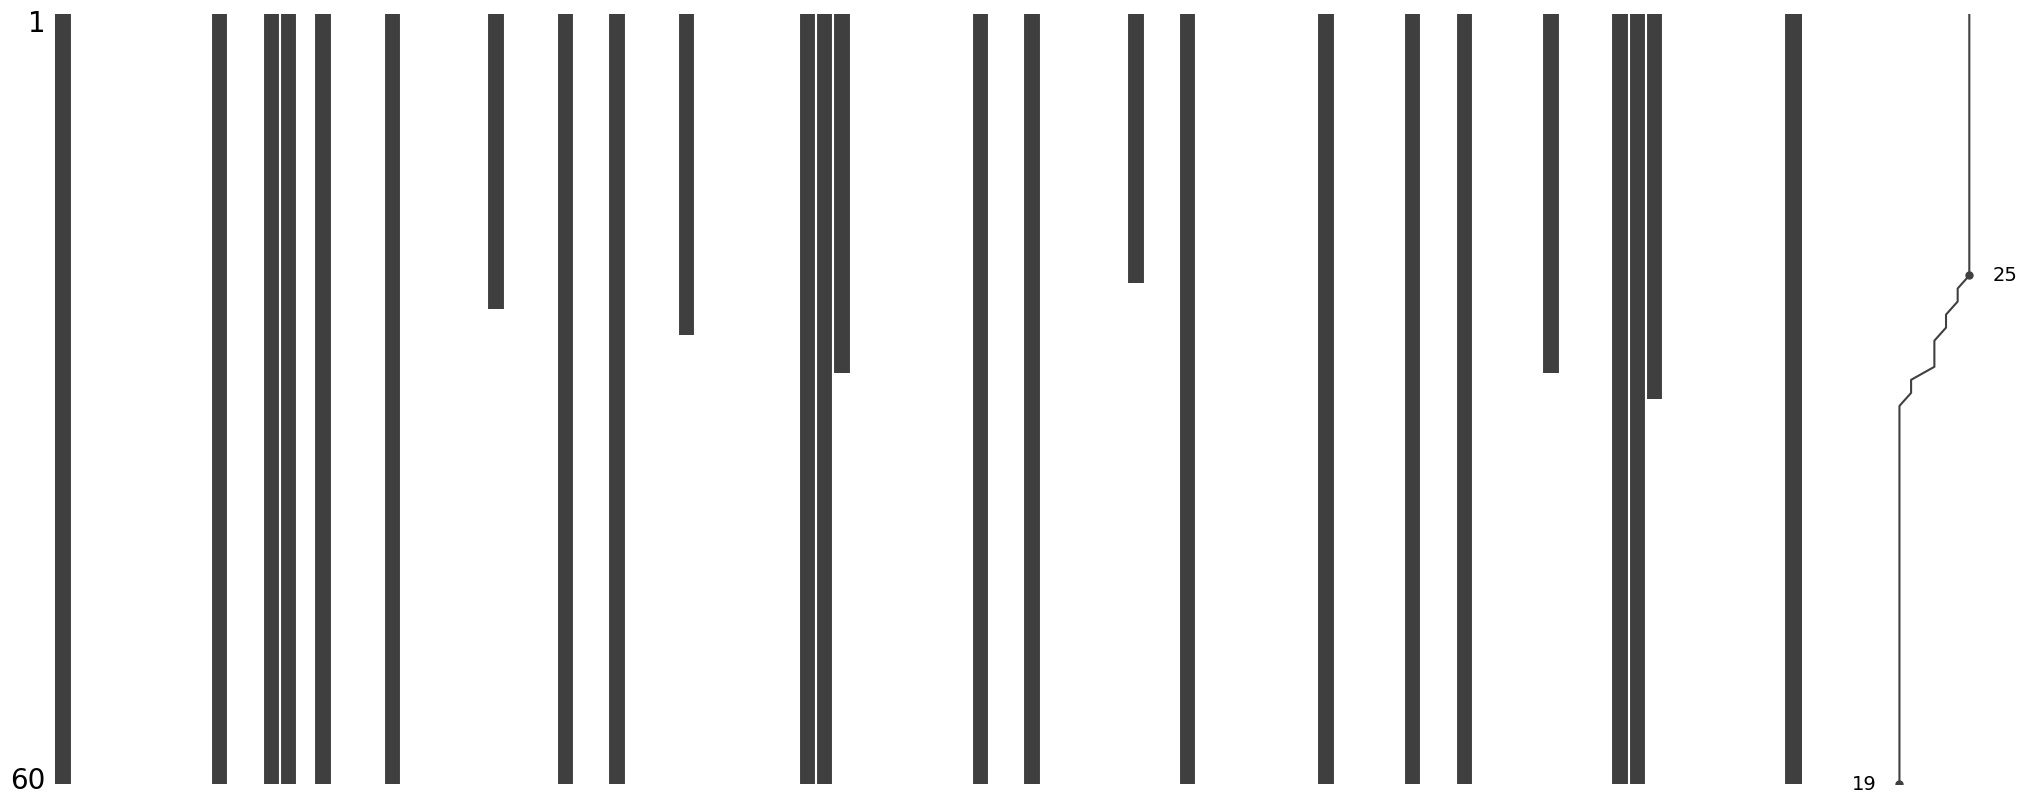

In [25]:
msno.matrix(data)

33 заполненных тикеров

In [22]:
missing_values = ((data.isna().sum() / len(data)) * 100).sort_values(ascending=False)
missing_values

MND          100.0
ZABAKU       100.0
LEOS         100.0
BTV          100.0
WOLVERINU    100.0
             ...  
CREDIT         0.0
AVA            0.0
WINGS          0.0
BBP            0.0
BTC            0.0
Length: 101, dtype: float64

In [26]:
len(bad_tikers)

82

In [27]:
for bad_tik in bad_tikers:
    data.drop(bad_tik, axis=1, inplace=True)

In [28]:
data

KRL       BBP     WINGS     AVA    CREDIT      CFX      XIOS     VIVID  \
0   0.2994  0.001090  0.002615  0.6437  0.000218  0.05410  0.001761  0.005230   
1   0.2991  0.001091  0.002619  0.6446  0.000218  0.05423  0.001761  0.005237   
2   0.2995  0.001086  0.002606  0.6409  0.000217  0.05352  0.001761  0.005212   
3   0.2997  0.001088  0.002612  0.6403  0.000218  0.05339  0.001761  0.005223   
4   0.2995  0.001091  0.002617  0.6398  0.000014  0.05385  0.001761  0.005235   
5   0.2996  0.001092  0.002621  0.6424  0.000218  0.05391  0.001761  0.005242   
6   0.3004  0.001092  0.002621  0.6426  0.000218  0.05393  0.001761  0.005242   
7   0.3010  0.001091  0.002619  0.6421  0.000218  0.05362  0.001761  0.005238   
8   0.3008  0.001094  0.002627  0.6398  0.000219  0.05394  0.001761  0.005253   
9   0.3006  0.001087  0.002609  0.6254  0.000217  0.05157  0.001761  0.005217   
10  0.3005  0.001081  0.002593  0.6161  0.000014  0.04927  0.001761  0.005186   
11  0.3007  0.001081  0.002596  0.6134  0.000022  0.04975  0.001761  0.005191   
12  0.3000  0.001081  0.002595  0.6170  0.000216  0.05055  0.001761  0.005190   
13  0.3007  0.001084  0.002601  0.6191  0.000217  0.05121  0.001761  0.005203   
14  0.3002  0.001080  0.002591  0.6137  0.000216  0.05059  0.001761  0.005182   
15  0.2988  0.001084  0.002602  0.6168  0.000217  0.05109  0.001761  0.005205   
16  0.2985  0.001079  0.002590  0.6140  0.000216  0.05037  0.001761  0.005179   
17  0.2980  0.001076  0.002582  0.6047  0.000215  0.04932  0.001761  0.005165   
18  0.2962  0.001073  0.002576  0.6033  0.000215  0.04922  0.001761  0.005153   
19  0.2999  0.001083  0.002598  0.6132  0.000014  0.05021  0.001761  0.005196   
20  0.2945  0.001081  0.002595  0.6126  0.000015  0.05042  0.001761  0.005190   
21  0.2949  0.001083  0.002600  0.6184  0.000217  0.05048  0.001761  0.005200   
22  0.2951  0.001081  0.002595  0.6333  0.000216  0.05009  0.001761  0.005191   
23  0.2947  0.001082  0.002598  0.6280  0.000217  0.05030  0.001761  0.005196   
24  0.2987  0.001089  0.002615  0.6314  0.000218  0.05167  0.001761  0.005229   
25  0.2956  0.001088  0.002610  0.6312  0.000218  0.05167  0.001761  0.005221   
26  0.2953  0.001086  0.002606  0.6259  0.000015  0.05146  0.001761  0.005212   
27  0.2953  0.001086  0.002607  0.6297  0.000217  0.05143  0.001761  0.005215   
28  0.2953  0.001086  0.002606  0.6299  0.000217  0.05143  0.001761  0.005211   
29  0.2961  0.001086  0.002607  0.6288  0.000217  0.05115  0.001761  0.005214   
30  0.2967  0.001087  0.002609  0.6286  0.000217  0.05109  0.001761  0.005218   
31  0.2957  0.001088  0.002611  0.6284  0.000018  0.05116  0.001761  0.005222   
32  0.2966  0.001089  0.002614  0.6286  0.000018  0.05094  0.001761  0.005228   
33  0.2966  0.001085  0.002605  0.6252  0.000018  0.05038  0.001761  0.005210   
34  0.2993  0.001091  0.002620  0.6296  0.000218  0.05128  0.001761  0.005239   
35  0.2966  0.001091  0.002619  0.6304  0.000218  0.05377  0.001761  0.005237   
36  0.2959  0.001091  0.002618  0.6249  0.000022  0.05355  0.001761  0.005237   
37  0.2959  0.001093  0.002624  0.6249  0.000219  0.05337  0.001761  0.005248   
38  0.2980  0.001087  0.002608  0.6204  0.000217  0.05320  0.001761  0.005217   
39  0.2968  0.001112  0.002669  0.6332  0.000222  0.05492  0.001761  0.005337   
40  0.2958  0.001102  0.002645  0.6334  0.000220  0.05486  0.001761  0.005290   
41  0.2966  0.001101  0.002641  0.6286  0.000220  0.05405  0.001761  0.005283   
42  0.2957  0.001103  0.002647  0.6291  0.000221  0.05521  0.001761  0.005294   
43  0.2964  0.001106  0.002655  0.6354  0.000221  0.05600  0.001761  0.005310   
44  0.2972  0.001111  0.002666  0.6381  0.000222  0.05542  0.001761  0.005332   
45  0.2980  0.001113  0.002671  0.6370  0.000026  0.05528  0.001761  0.005342   
46  0.2982  0.001113  0.002670  0.6384  0.000222  0.05570  0.001761  0.005340   
47  0.2975  0.001110  0.002663  0.6378  0.000222  0.05551  0.001761  0.005326   
48  0.2981  0.001110  0.002665  0.6398

<AxesSubplot: >

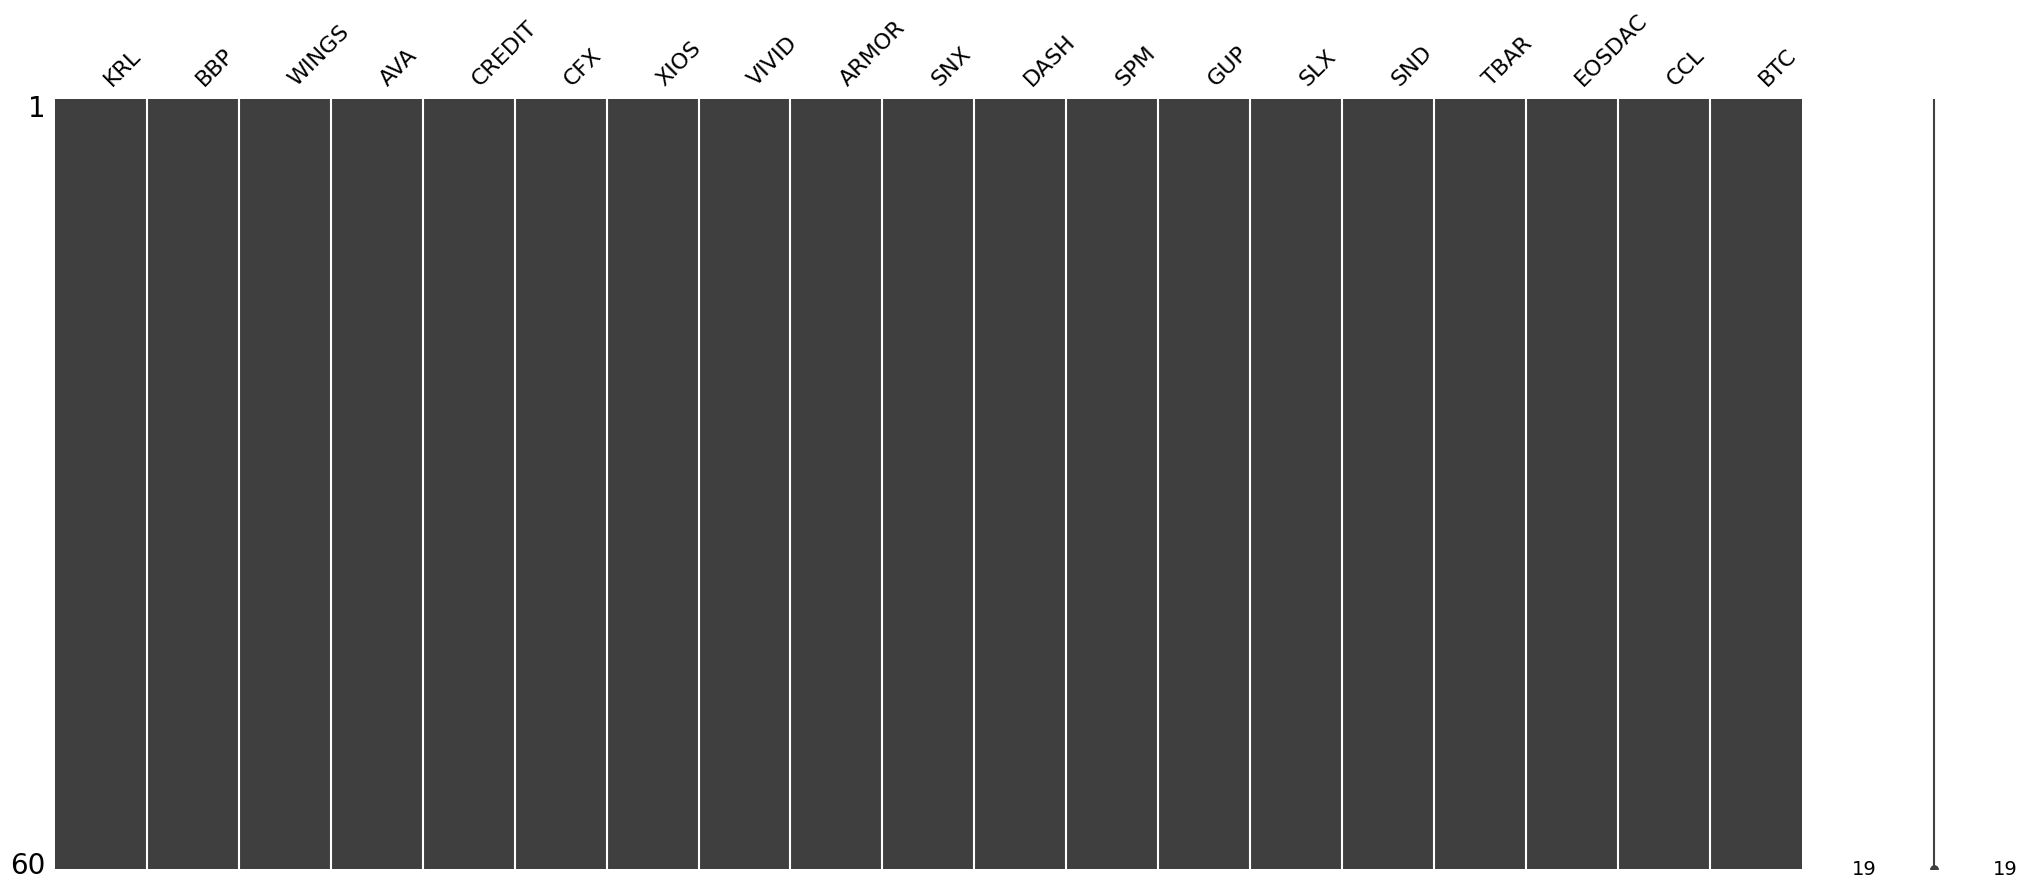

In [29]:
msno.matrix(data)

In [30]:
data.shape

(60, 19)

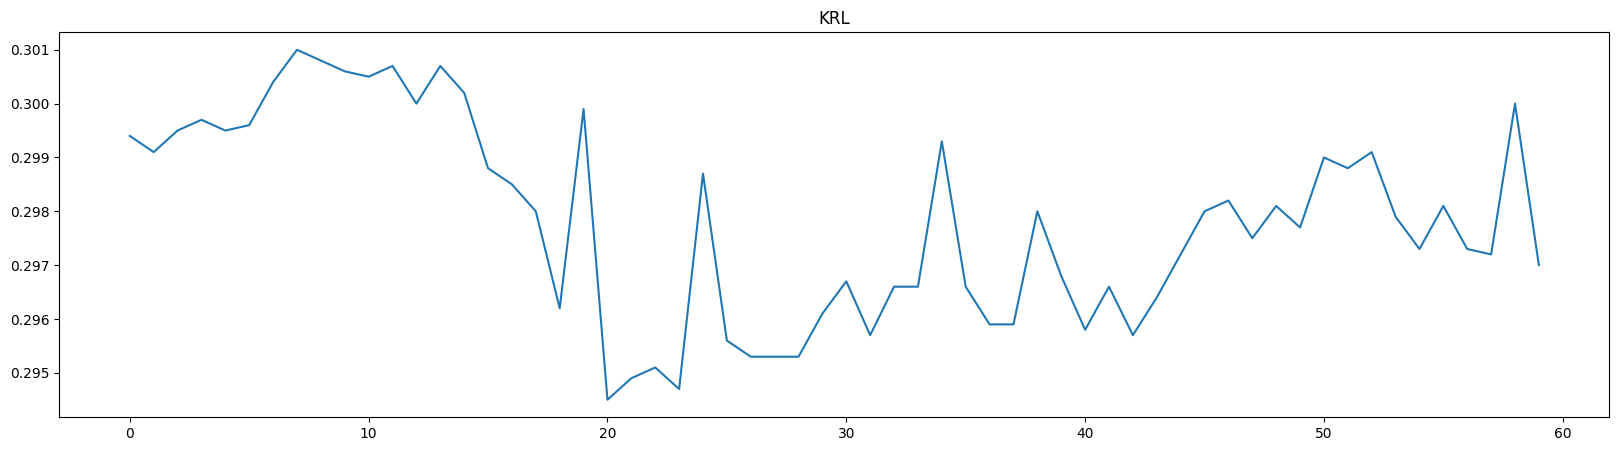

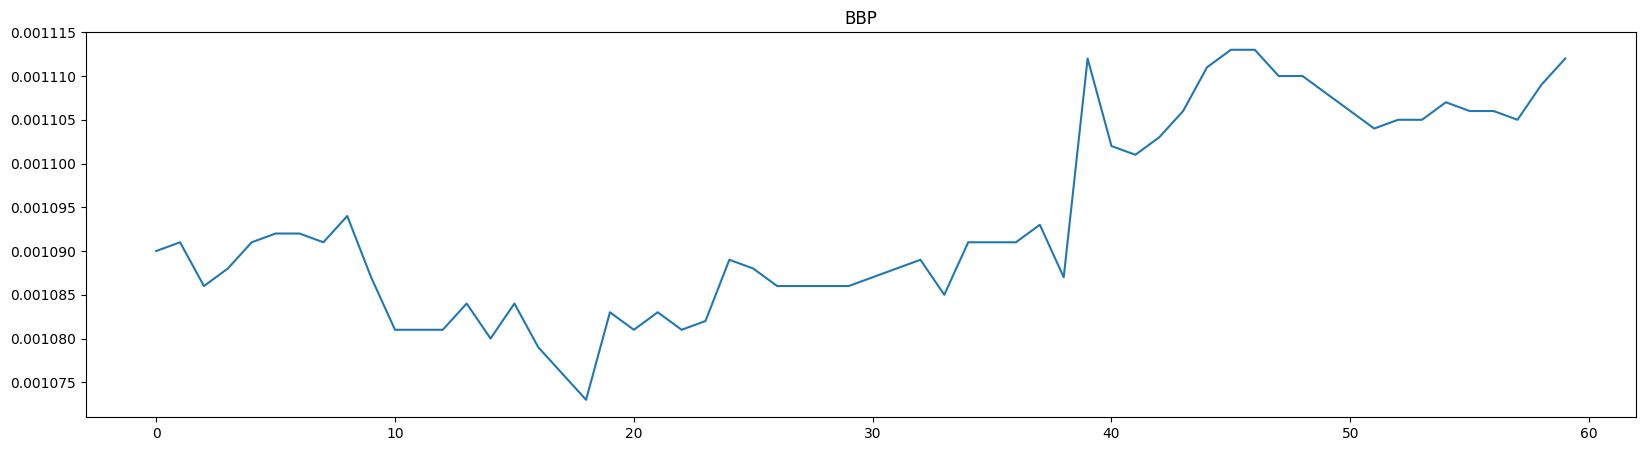

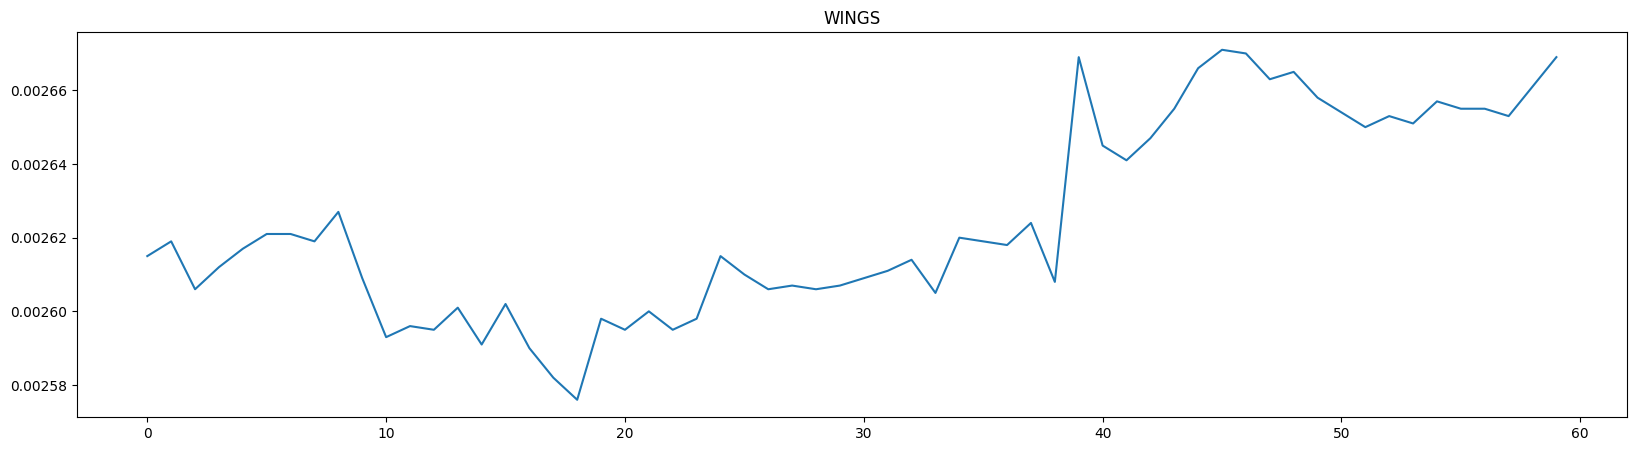

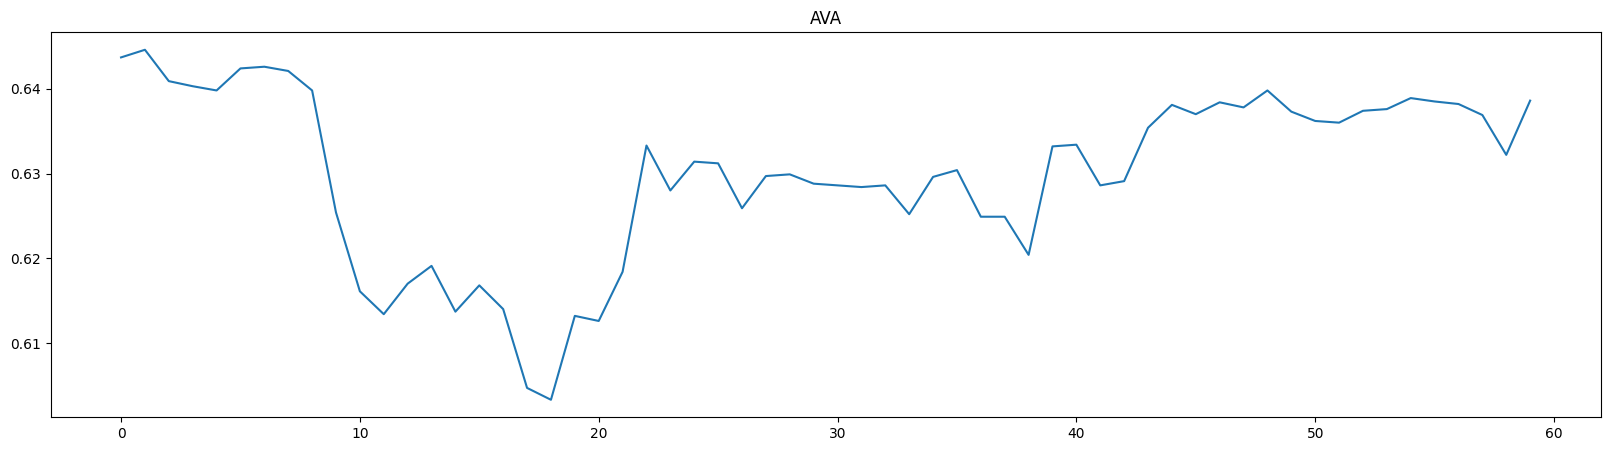

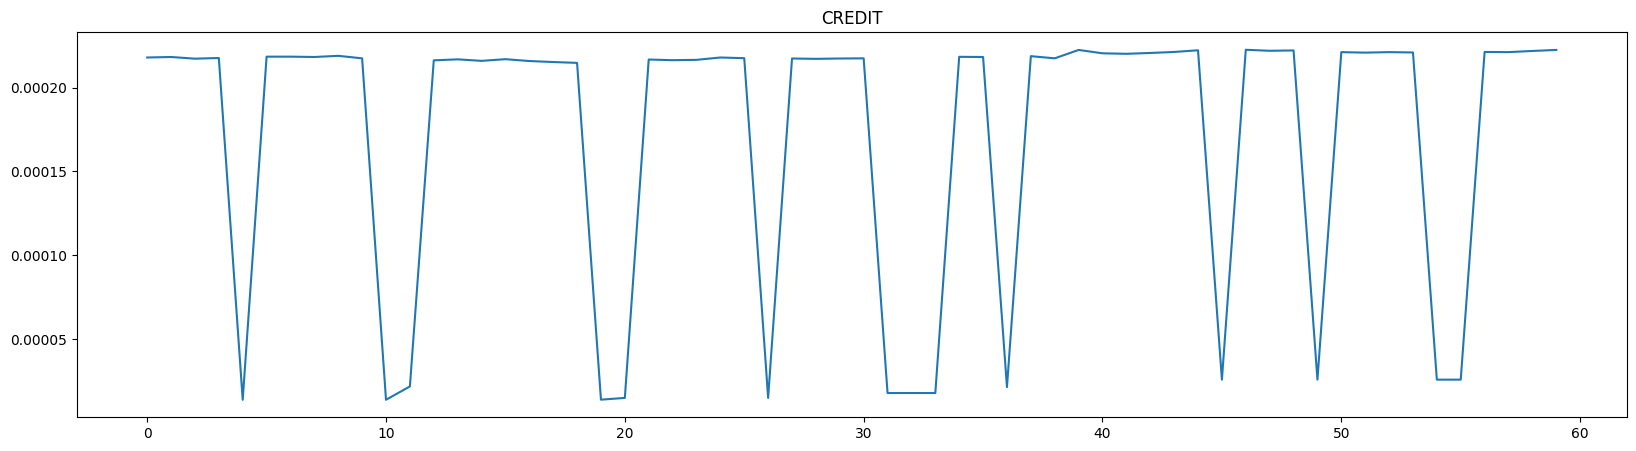

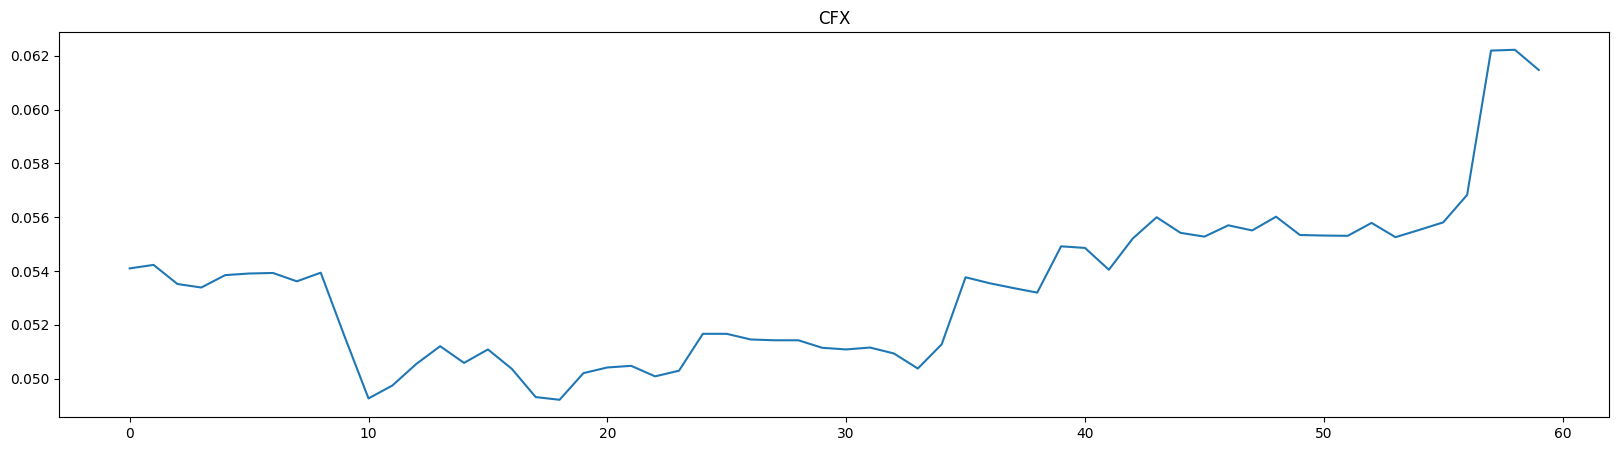

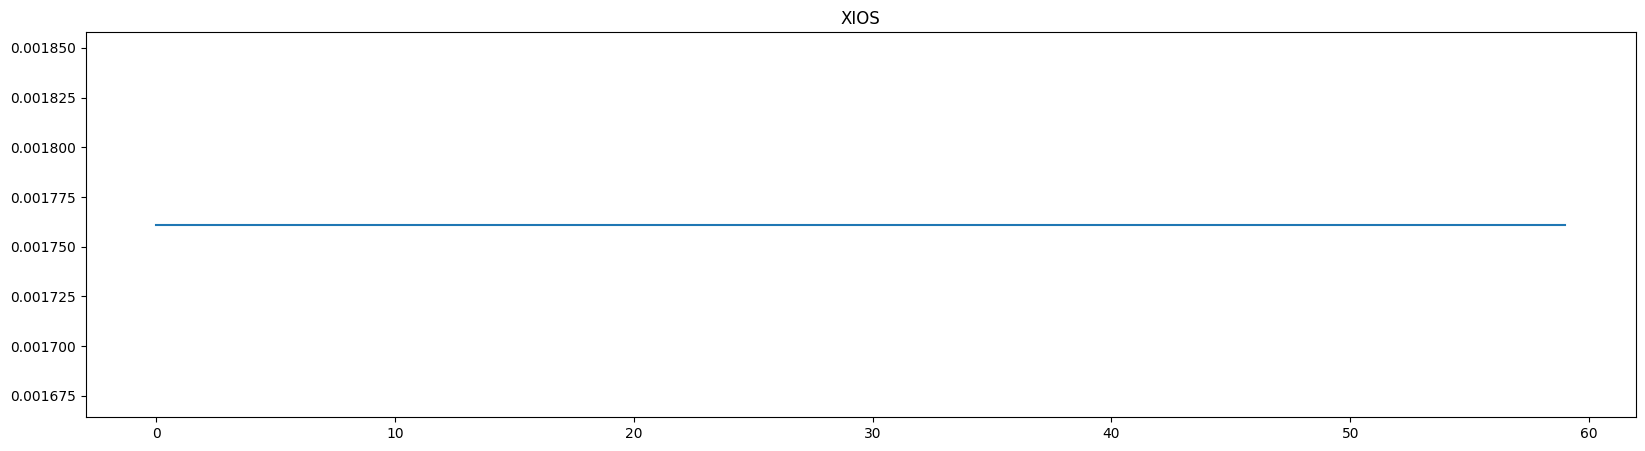

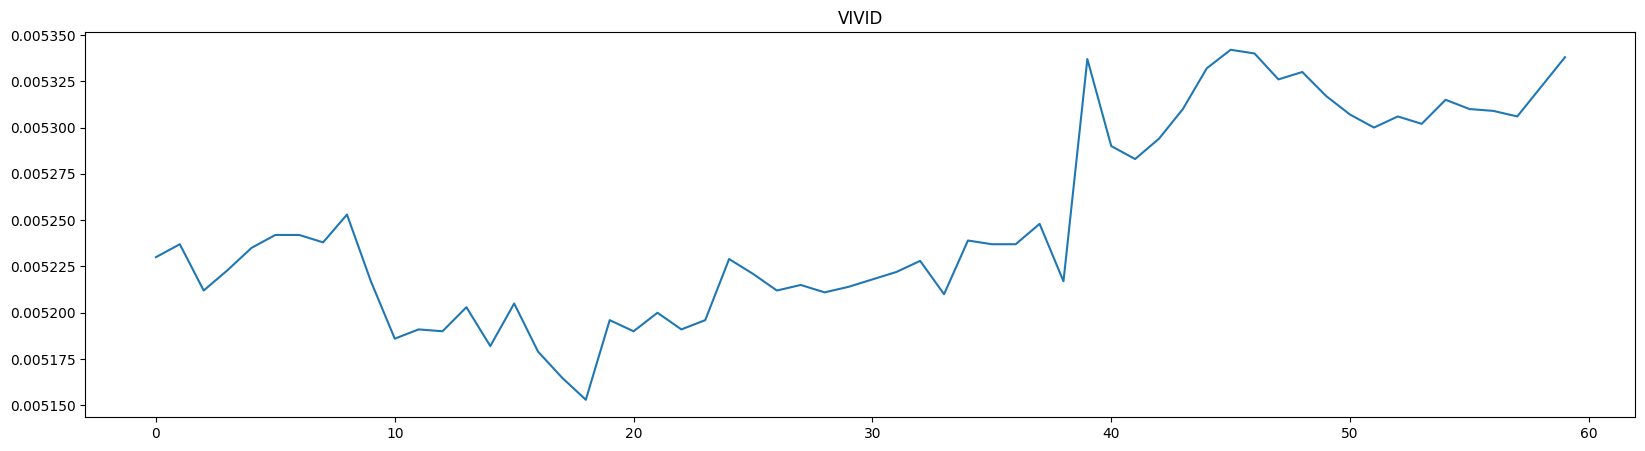

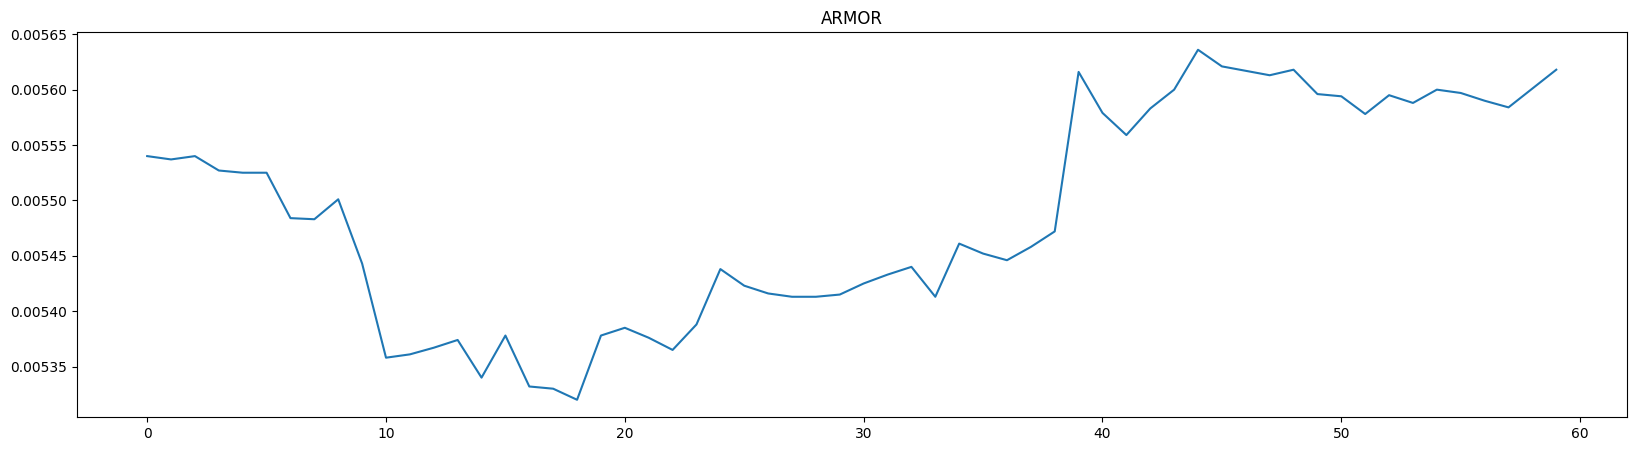

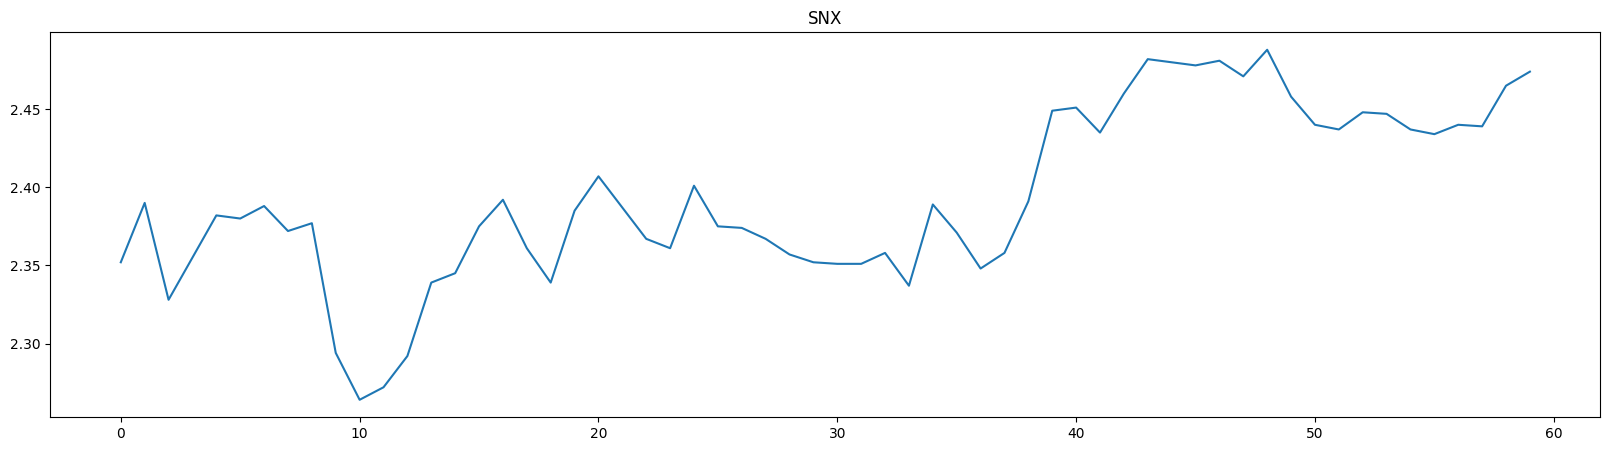

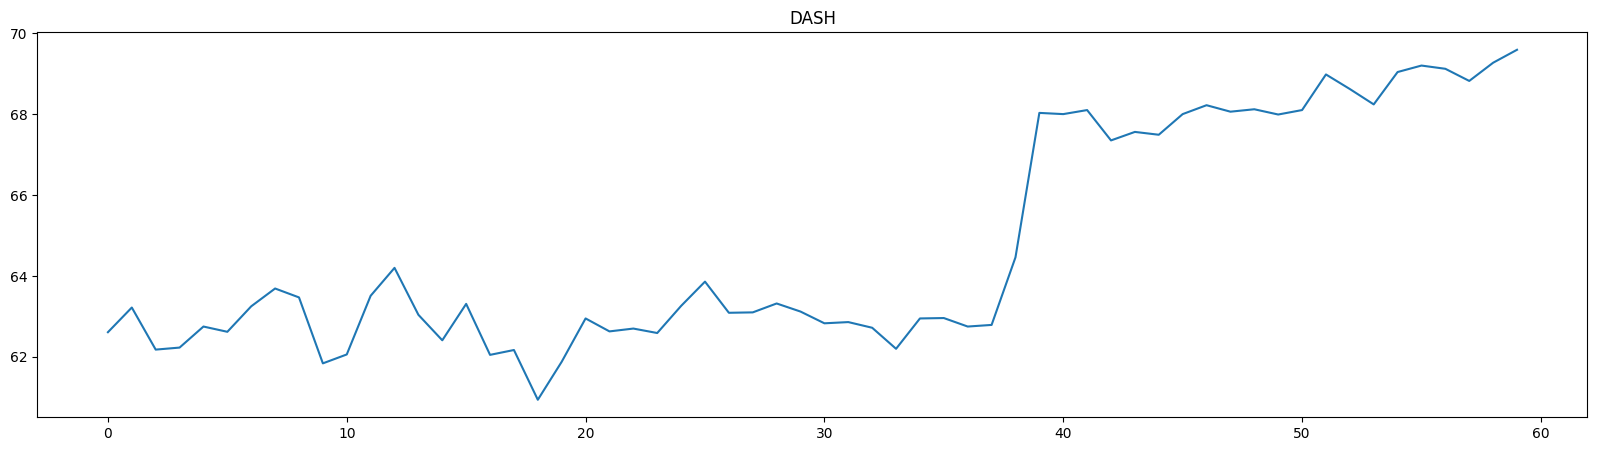

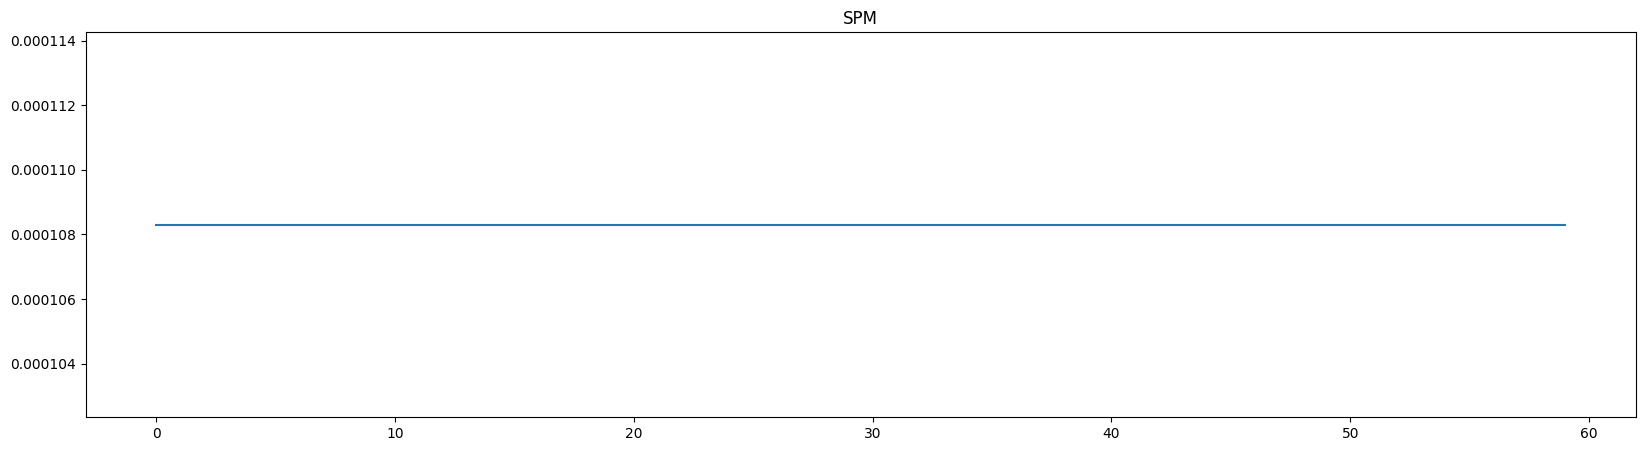

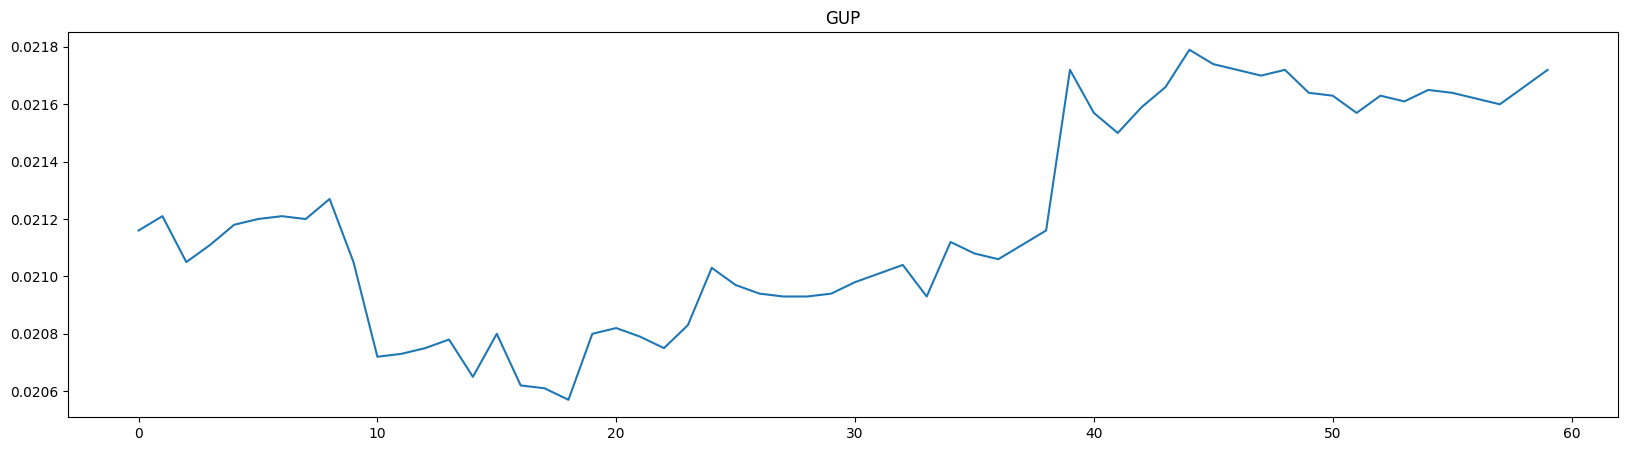

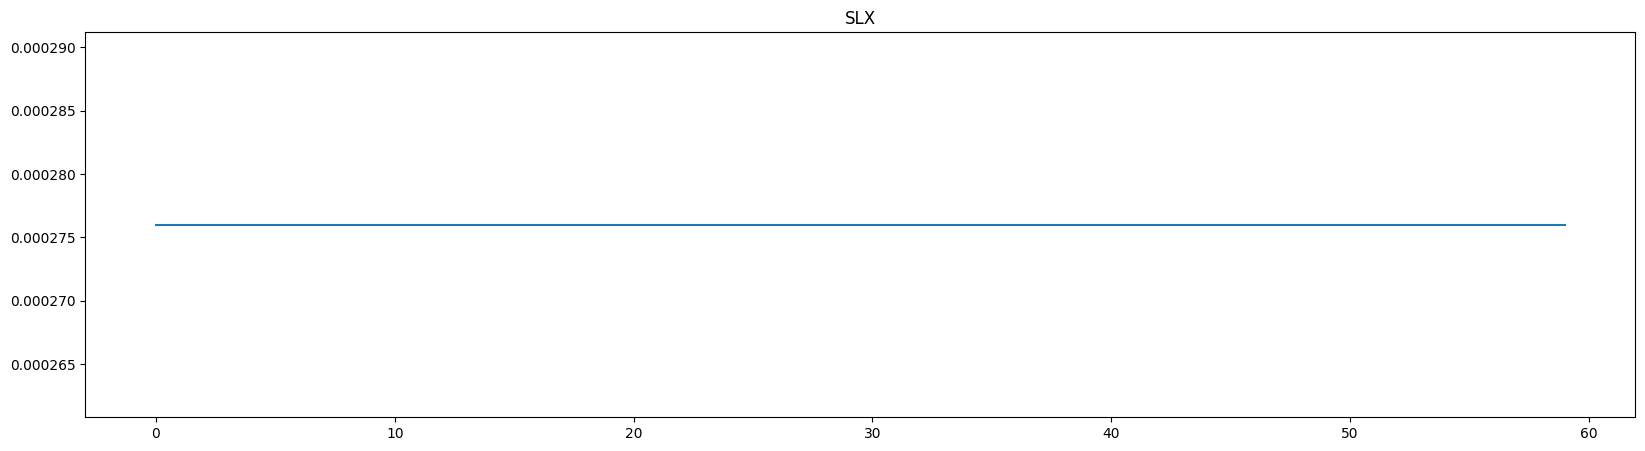

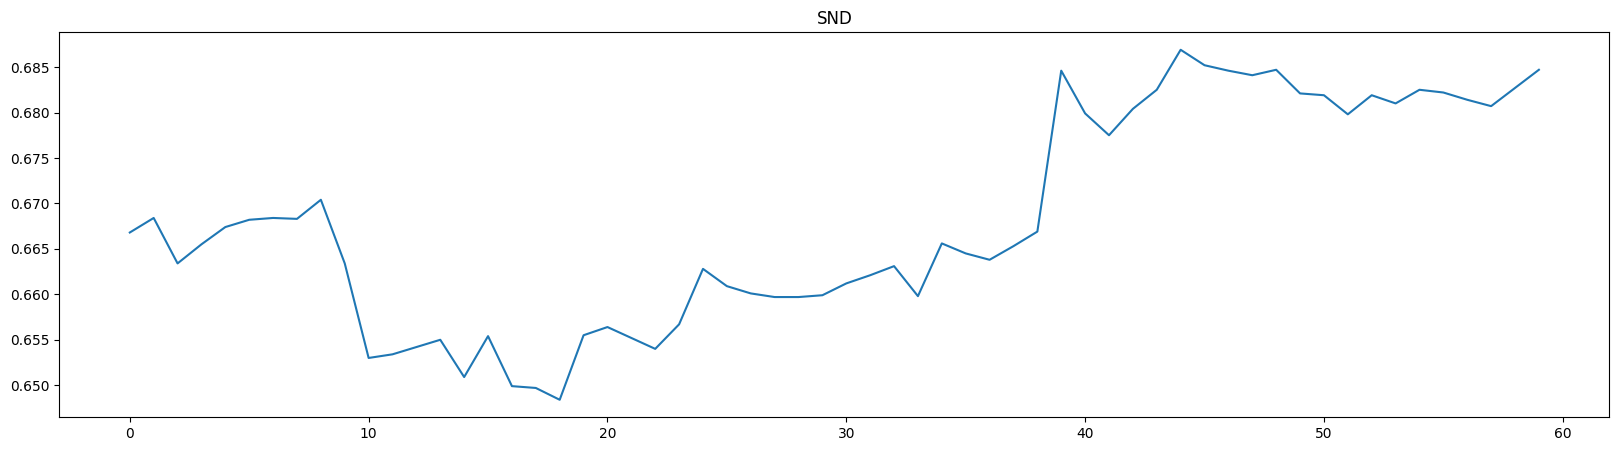

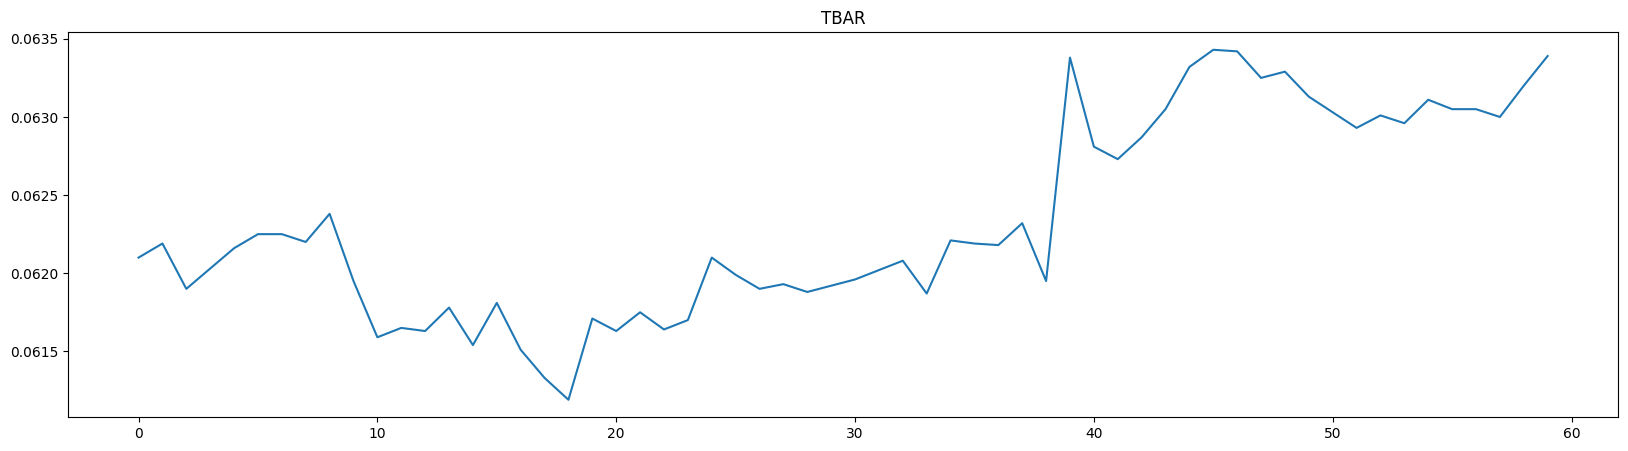

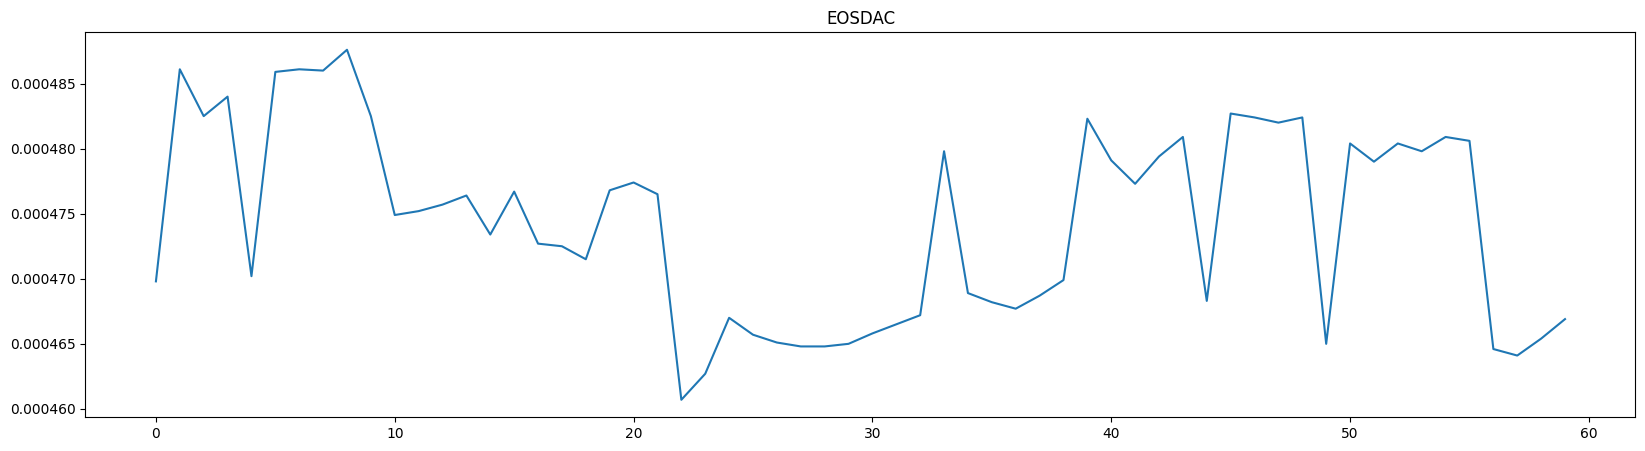

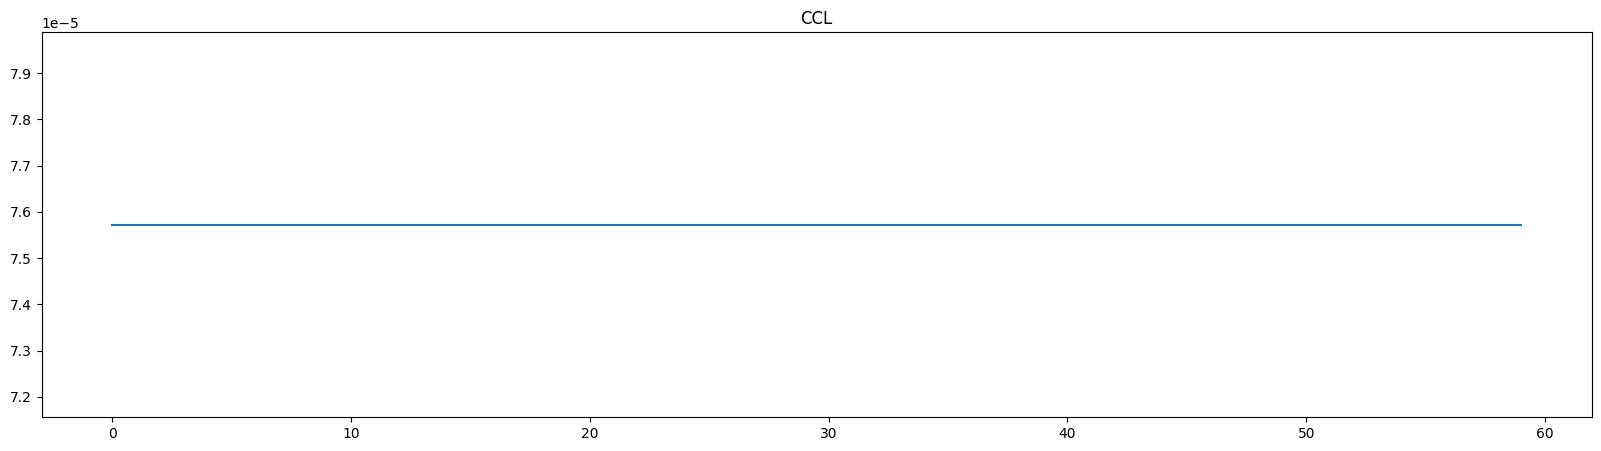

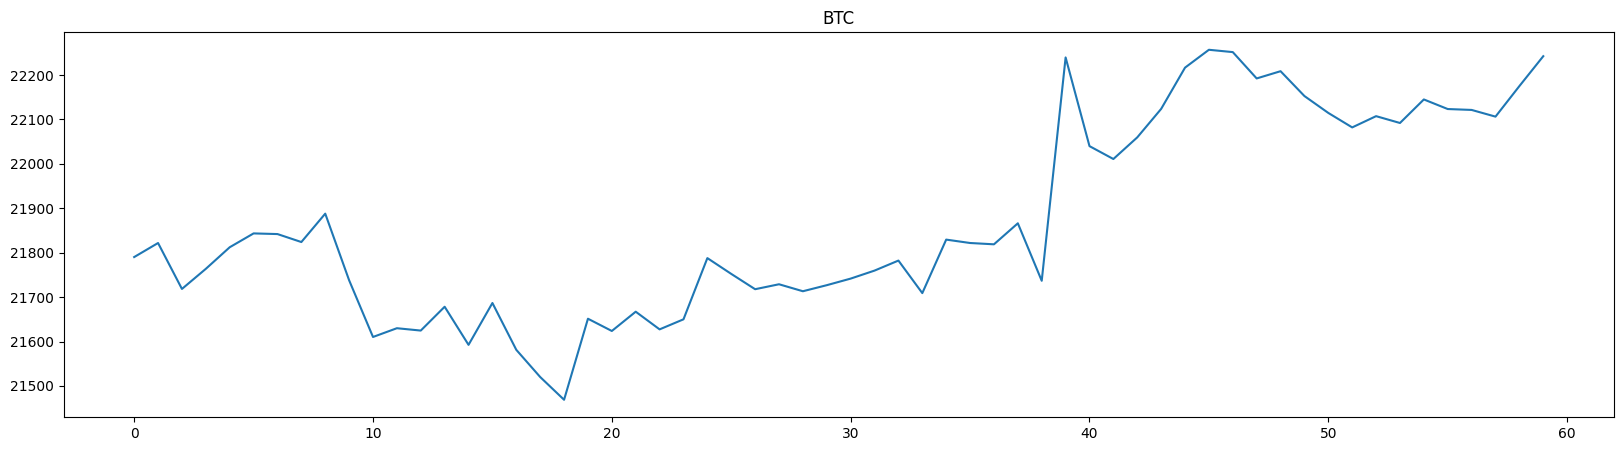

In [31]:
for col in data.columns:
    plt.figure(figsize=(20,5))
    plt.title(col)
    plt.plot(data[col]) 

In [136]:
# data = data.drop('cluster', axis=1)

## Scaling everything

In [137]:
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(data.iloc[:,:]) 

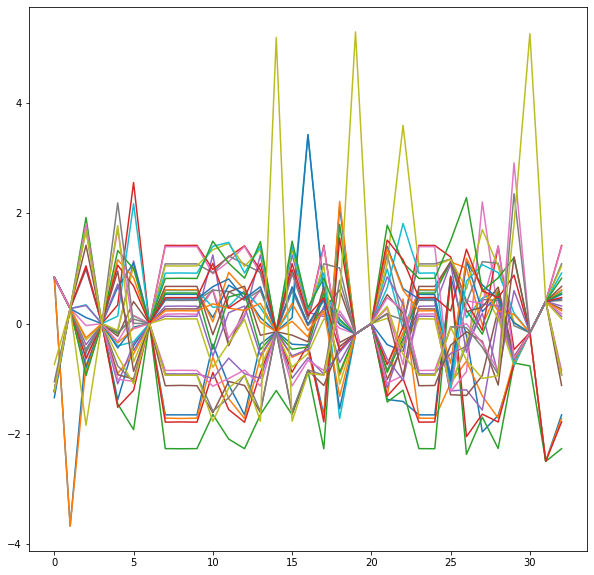

In [138]:
plt.figure(figsize=(10, 10))
plt.plot(tickers_scaled.T);

In [133]:
tickers_scaled[0]

array([ 8.36435776e-01, -3.67423461e+00, -4.66783817e-01,  0.00000000e+00,
       -1.38234086e+00, -4.03042499e-01, -3.30872245e-24, -1.65604559e+00,
       -1.65558784e+00, -1.65604559e+00, -3.73186329e-01, -1.11320876e+00,
       -1.65663151e+00, -3.72499021e-01, -1.47242035e-01, -3.74486961e-01,
       -3.91504354e-01, -1.65701180e+00,  2.12207753e+00, -1.88982237e-01,
       -2.71050543e-20, -1.37687021e+00, -1.41314799e+00, -1.65604559e+00,
       -1.65691385e+00,  8.61929919e-01, -2.25943791e-01, -1.96590366e+00,
       -1.66619694e+00, -7.64970499e-01, -1.66306150e-01, -2.50000000e+00,
       -1.65708013e+00,  0.00000000e+00])

In [134]:
tickers_scaled[1]

array([ 8.36435776e-01, -3.67423461e+00, -7.56383801e-01,  0.00000000e+00,
       -9.04743136e-01, -5.50633215e-01, -3.30872245e-24, -1.71610727e+00,
       -1.72164982e+00, -1.71610727e+00, -6.06763383e-01, -1.36379595e+00,
       -1.72331990e+00, -6.12553946e-01, -1.47242035e-01, -6.11578767e-01,
       -4.80303666e-01, -1.71705346e+00,  2.21569385e+00, -1.88982237e-01,
       -2.71050543e-20, -1.31270395e+00,  4.46158864e-01, -1.71610727e+00,
       -1.71919001e+00, -1.07987257e+00, -6.80389830e-01, -1.31453128e+00,
       -1.71418076e+00, -6.63056432e-01, -1.66306150e-01, -2.50000000e+00,
       -1.72050163e+00,  0.00000000e+00])

### 2 version of scaling

In [139]:
fm = data.mean(axis=1)
data = data.apply(lambda x: x - fm, axis=0)
W_abs = data.abs().sum(axis=1)
data = data.div(np.where(W_abs == 0, 1e-6, W_abs), axis='index')
data

GREXIT     BITCM       INK       CMA      TLOS      FUND  \
timestep                                                                   
1.673827e+09 -0.015721 -0.015721 -0.015721 -0.015721 -0.015717 -0.015712   
1.673914e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015717 -0.015711   
1.674000e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015712   
1.674086e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015711   
1.674173e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015714 -0.015709   
1.674259e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015714 -0.015709   
1.674346e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015714 -0.015710   
1.674432e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015717 -0.015713   
1.674518e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015714 -0.015710   
1.674605e+09 -0.015718 -0.015718 -0.015718 -0.015718 -0.015715 -0.015710   
1.674691e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015717 -0.015712   
1.674778e+09 -0.015720 -0.015721 -0.015721 -0.015721 -0.015717 -0.015712   
1.674864e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015711   
1.674950e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015709   
1.675037e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015709   
1.675123e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015710   
1.675210e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015711   
1.675296e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015717 -0.015712   
1.675382e+09 -0.015721 -0.015721 -0.015721 -0.015721 -0.015718 -0.015712   
1.675469e+09 -0.015722 -0.015722 -0.015722 -0.015722 -0.015718 -0.015711   
1.675555e+09 -0.015721 -0.015721 -0.015721 -0.015721 -0.015717 -0.015711   
1.675642e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015710   
1.675728e+09 -0.015720 -0.015720 -0.015720 -0.015721 -0.015717 -0.015711   
1.675814e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015715 -0.015710   
1.675901e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015716 -0.015712   
1.675987e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015715 -0.015711   
1.676074e+09 -0.015718 -0.015718 -0.015718 -0.015718 -0.015714 -0.015710   
1.676160e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015713 -0.015708   
1.676246e+09 -0.015718 -0.015718 -0.015718 -0.015718 -0.015714 -0.015710   

                  KUMA      URAC      ACHC       XCG  ...       ADT      DANK  \
timestep                                              ...                       
1.673827e+09 -0.015721 -0.015721 -0.015721 -0.015721  ... -0.015721 -0.015720   
1.673914e+09 -0.015720 -0.015720 -0.015720 -0.015720  ... -0.015720 -0.015720   
1.674000e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.674086e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.674173e+09 -0.015717 -0.015717 -0.015717 -0.015717  ... -0.015717 -0.015717   
1.674259e+09 -0.015717 -0.015717 -0.015717 -0.015717  ... -0.015717 -0.015716   
1.674346e+09 -0.015717 -0.015717 -0.015717 -0.015717  ... -0.015717 -0.015717   
1.674432e+09 -0.015720 -0.015720 -0.015720 -0.015720  ... -0.015720 -0.015720   
1.674518e+09 -0.015717 -0.015717 -0.015717 -0.015717  ... -0.015717 -0.015717   
1.674605e+09 -0.015718 -0.015718 -0.015718 -0.015718  ... -0.015718 -0.015718   
1.674691e+09 -0.015720 -0.015720 -0.015720 -0.015720  ... -0.015720 -0.015720   
1.674778e+09 -0.015721 -0.015721 -0.015721 -0.015721  ... -0.015721 -0.015720   
1.674864e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.674950e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.675037e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.675123e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.675210e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015718   
1.675296e+09 -0.015720 -0.015720 -0.015720 -0.015720  ... -0.015720 -0.015720   
1.675382e+09 -0.015721 -0.015721 -0.015

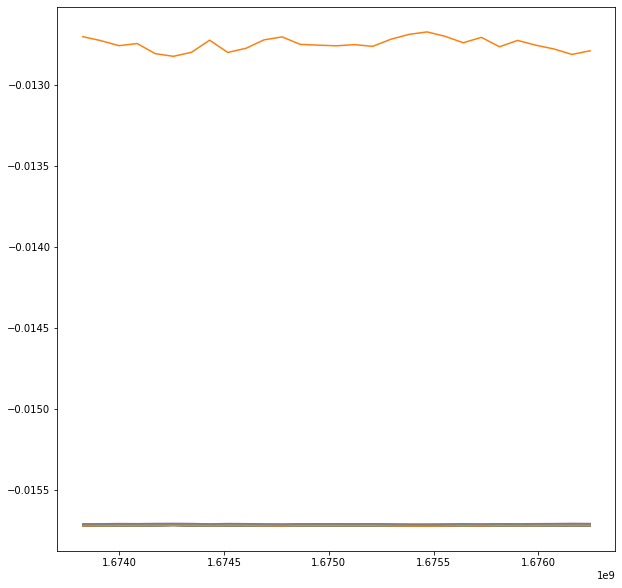

In [142]:
plt.figure(figsize=(10, 10))
plt.plot(data.iloc[:,:-1]);

## Basic KMeans

100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 43.02it/s]


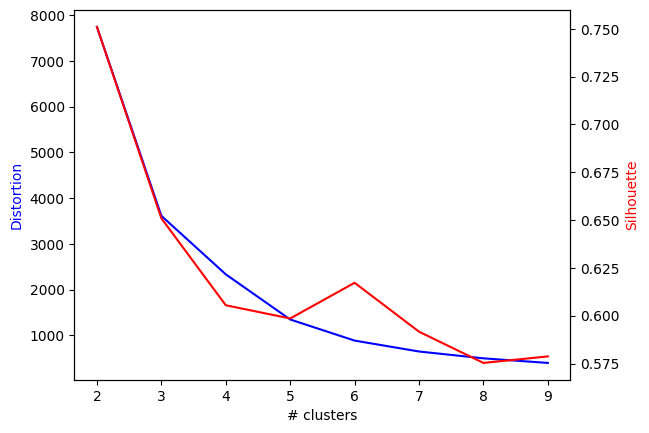

In [34]:
distortions = [] # Сумма кв расстояний от объектов до центра кластера, взвешенная по весам (при их наличии)
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(data, kmeanModel.labels_, metric="euclidean"))
    # silhouette_score считает насколько чисты кластеры
    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

In [35]:
n_clusters = 4
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=6, max_iter=10)
ts_kmeans.fit(data)

TimeSeriesKMeans(max_iter=10, n_clusters=4, n_jobs=6)

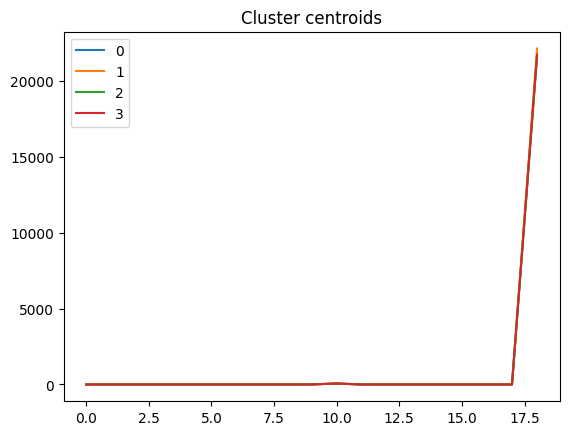

In [36]:
for cluster_number in range(n_clusters): # Построим усредненные ряды внутри каждого кластера
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids") # Быки и медведи
plt.legend()
plt.show()

In [38]:
# посмотрим наличие корреляции между полученными кластерами и биржевыми секторами
data['cluster'] = ts_kmeans.predict(data)
# pd.DataFrame(data.groupby('cluster').value_counts())

/Users/alsukurmakaeva/miniconda3/envs/dqual_alpha_nlp/lib/python3.10/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 60 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [125]:
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),
        4,
        figsize=(15, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[5:-1])
        ax[index].set_title(f"{row.shortName}\n{row.sector}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

                          Cluster number: 0


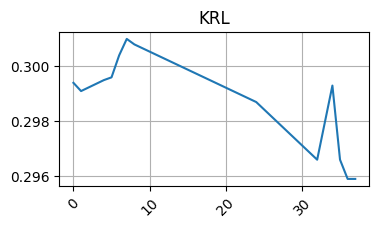

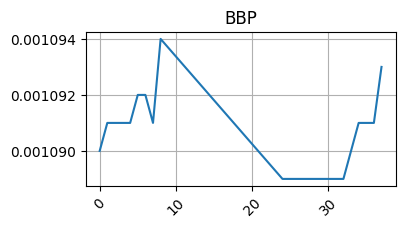

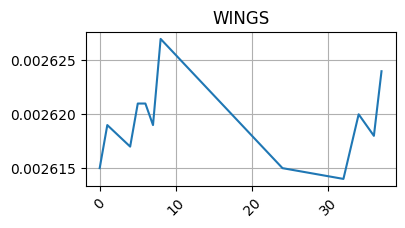

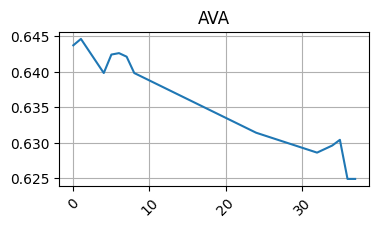

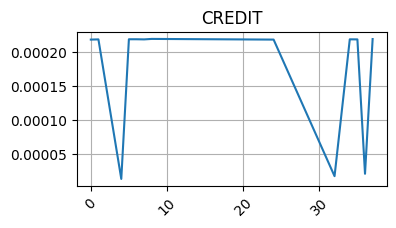

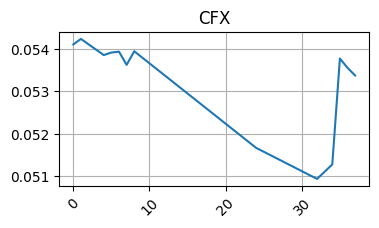

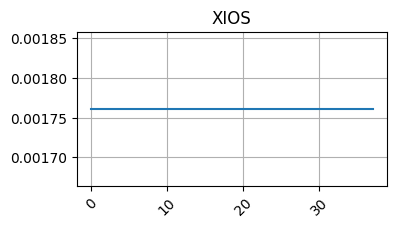

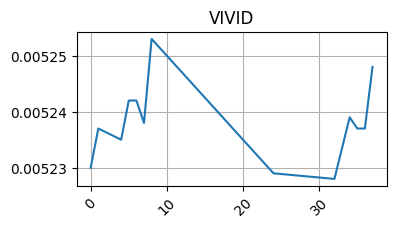

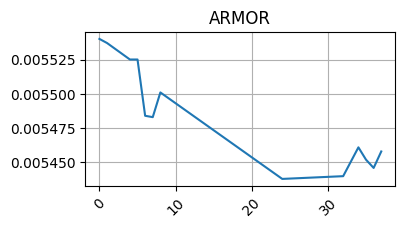

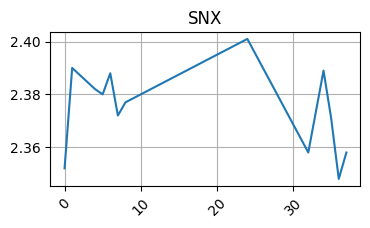

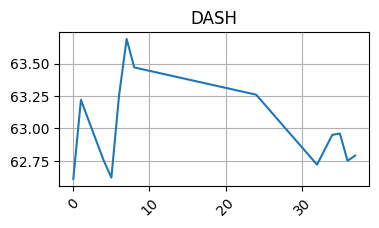

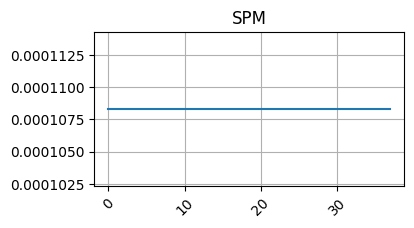

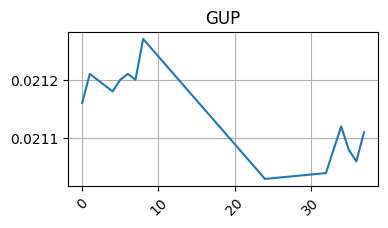

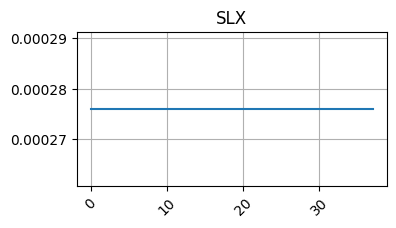

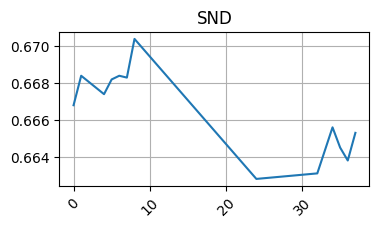

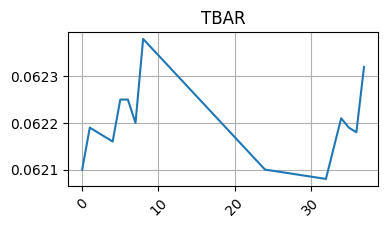

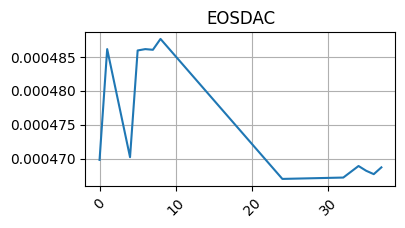

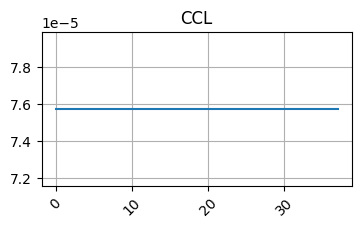

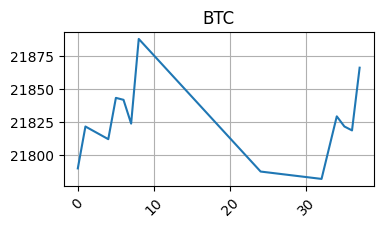

                          Cluster number: 1


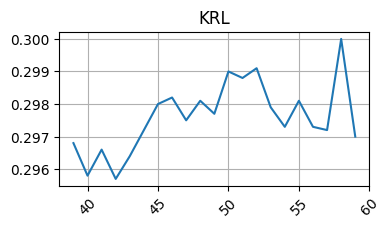

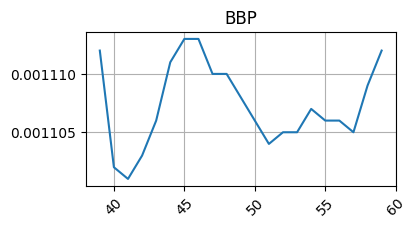

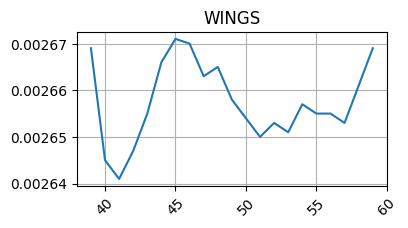

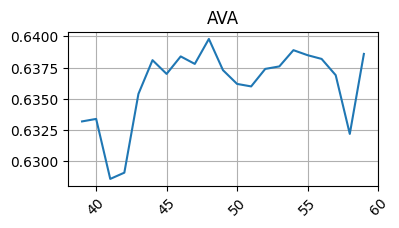

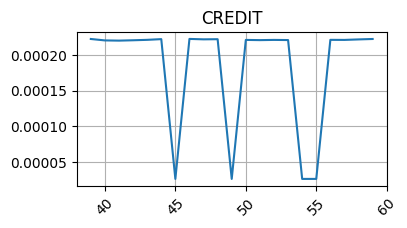

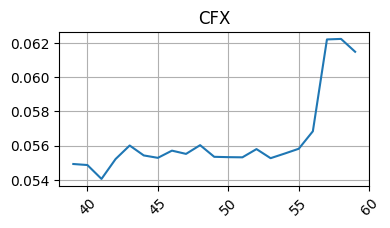

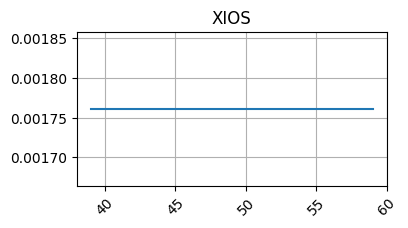

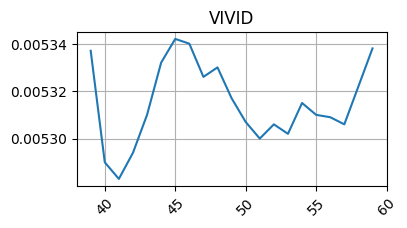

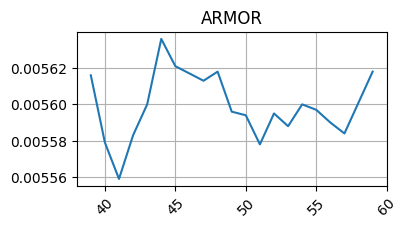

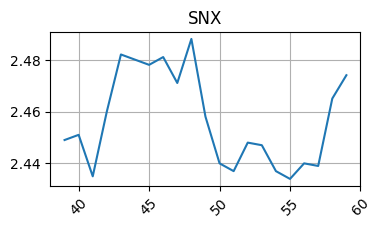

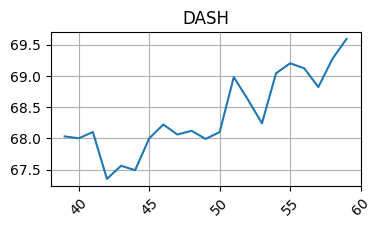

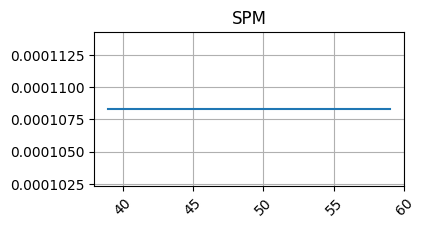

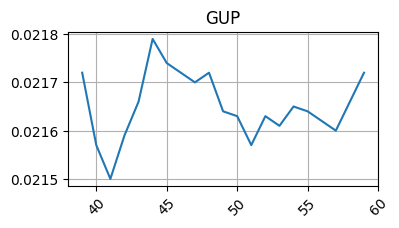

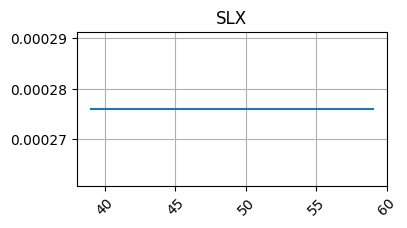

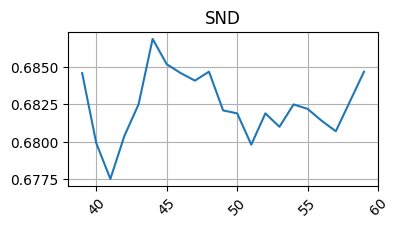

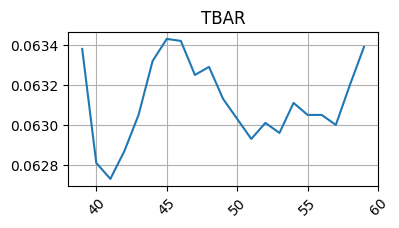

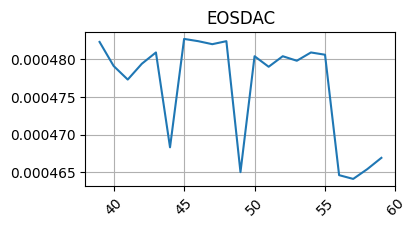

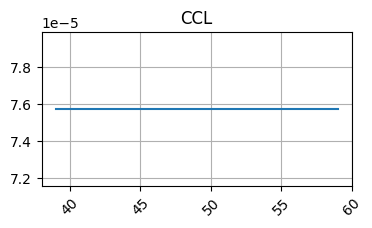

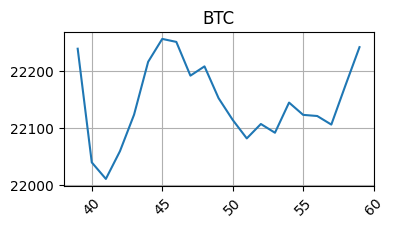

                          Cluster number: 2


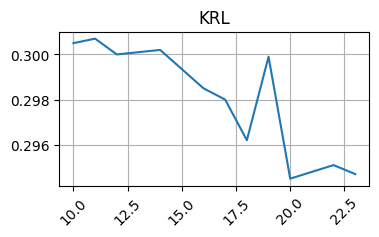

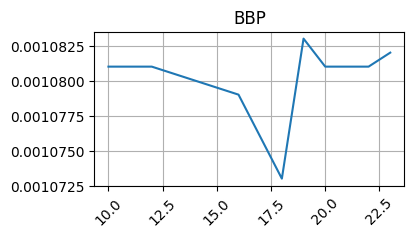

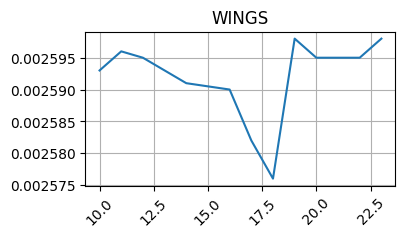

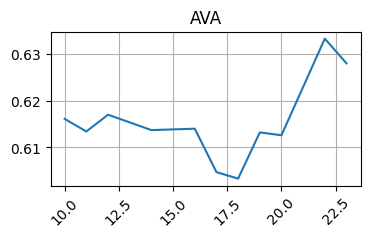

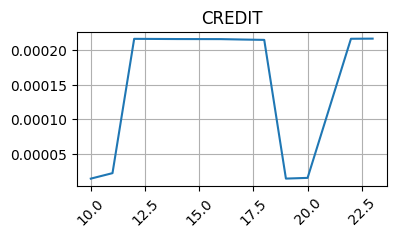

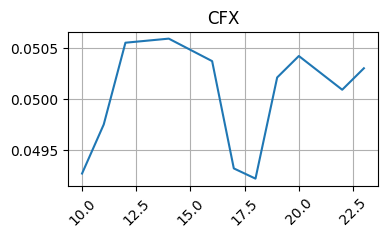

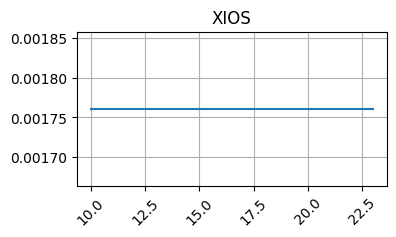

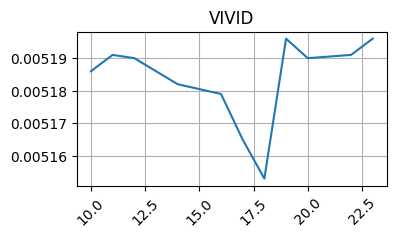

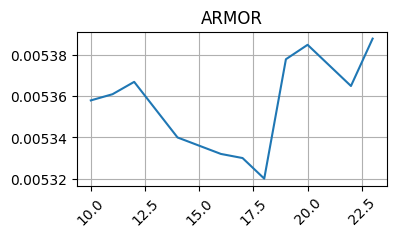

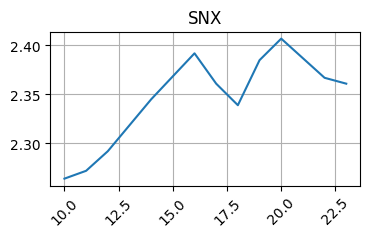

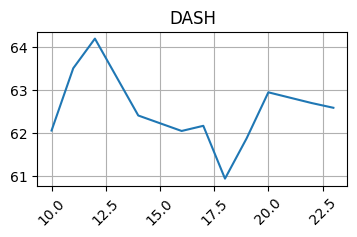

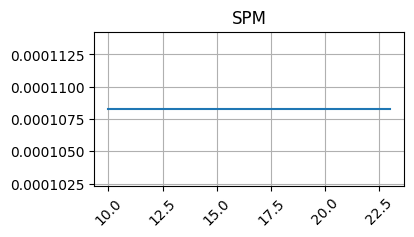

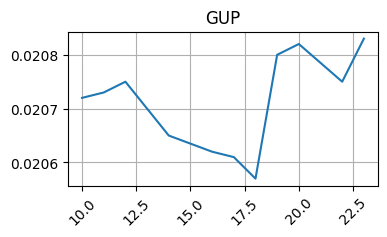

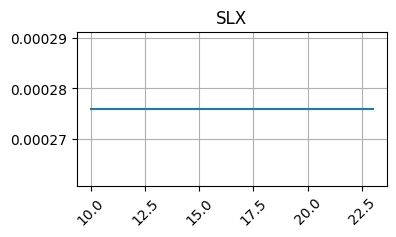

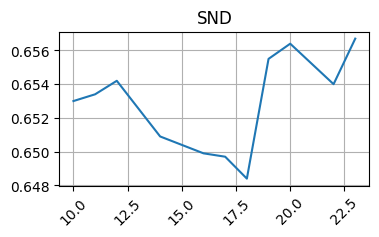

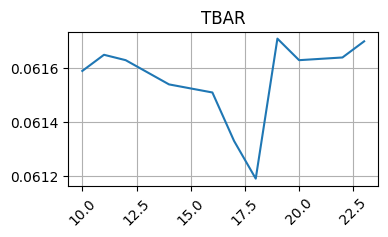

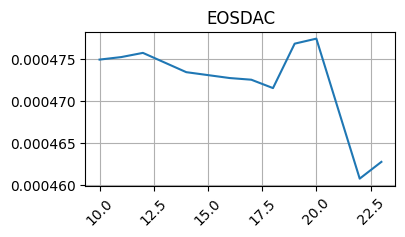

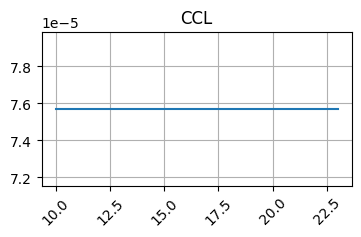

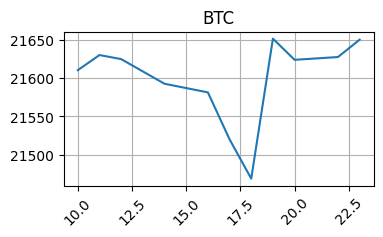

                          Cluster number: 3


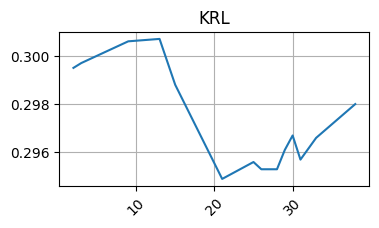

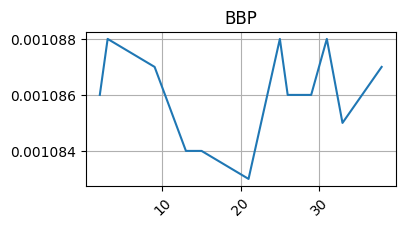

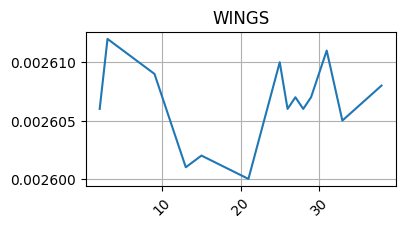

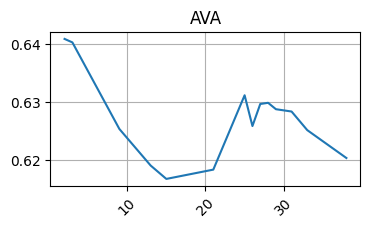

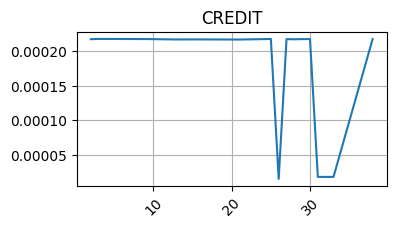

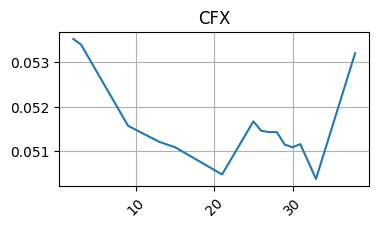

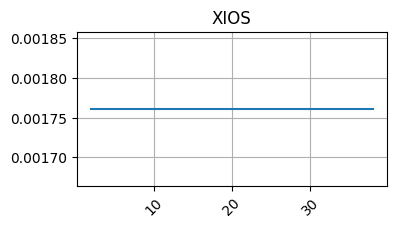

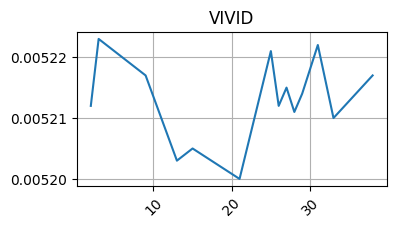

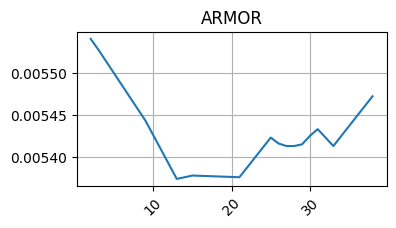

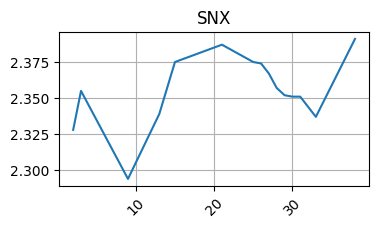

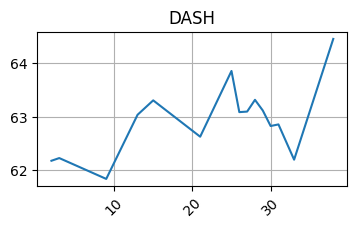

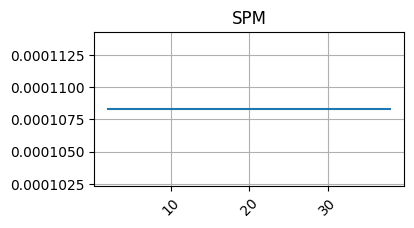

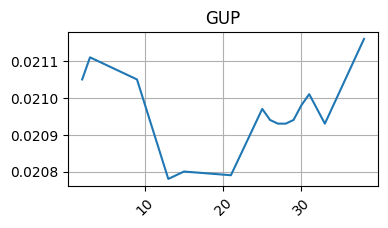

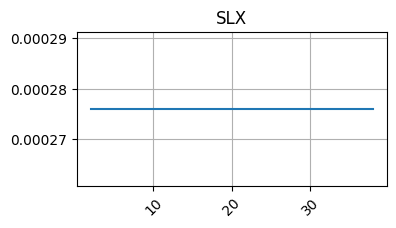

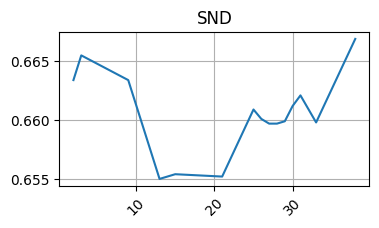

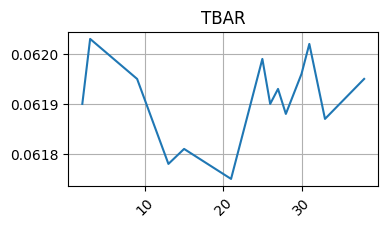

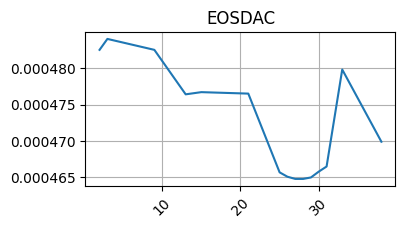

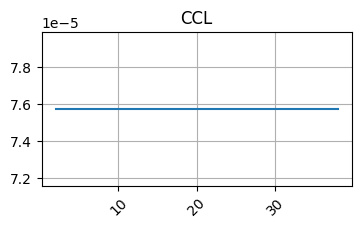

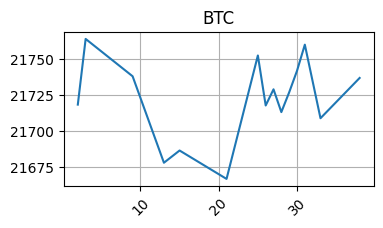

In [39]:
# TimeSeriesKMeans
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")

    df_cluster = data[data.cluster==cluster]
    
    for i in range(len(data.columns)):
        if data.columns[i] != 'cluster':
            plt.figure(figsize=(4,2))
            plt.plot(df_cluster[data.columns[i]])
            plt.xticks(rotation=45)
            plt.title(data.columns[i])
            plt.grid(True)
            plt.show()

## DTW

100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.34it/s]


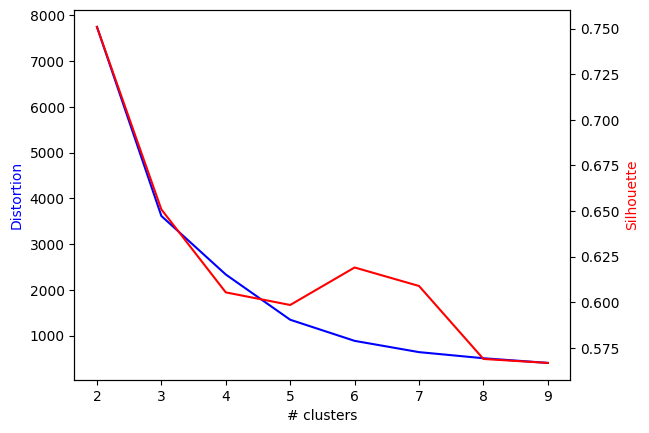

In [41]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
distortions = []
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(data.iloc[:, :-1], kmeanModel.labels_, metric="dtw"))
    
    # silhouette_score считает насколько чисты класстеры
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
    # Для metric="dtw" берем реализацию из tslearn:
    # https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.silhouette_score.html

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

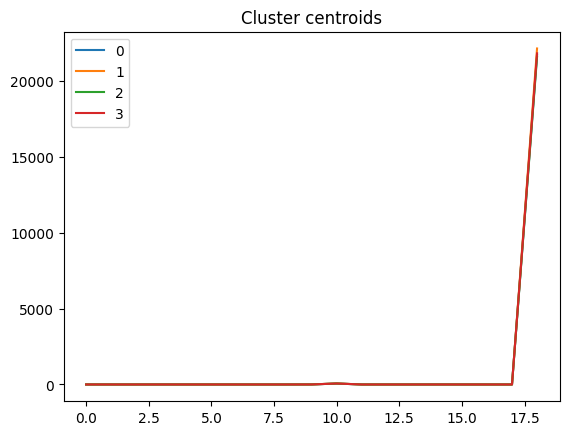

In [42]:
n_clusters = 4
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10,random_state=42)
ts_kmeans_dtw.fit(data.iloc[:, :-1])

for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans_dtw.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [1]:
# data['cluster'] = ts_kmeans_dtw.predict(data.iloc[:, :-1])

                          Cluster number: 0


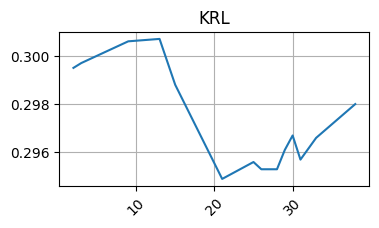

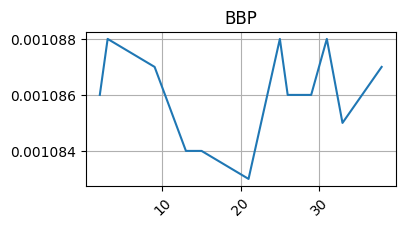

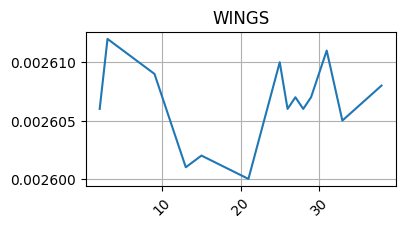

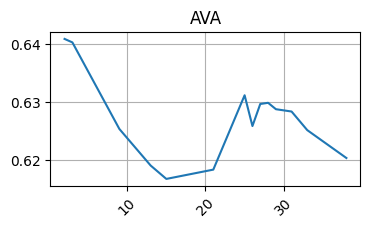

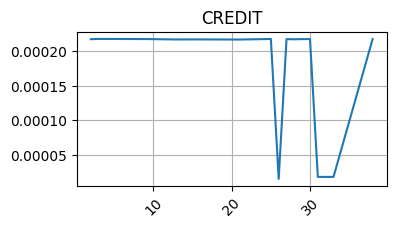

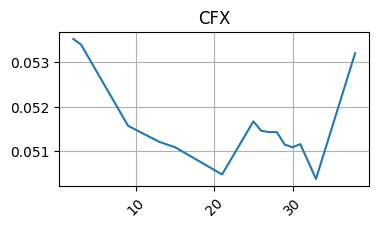

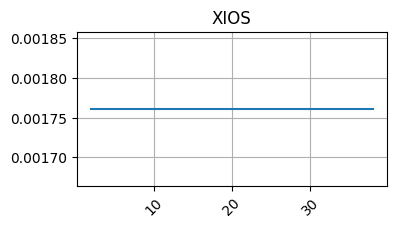

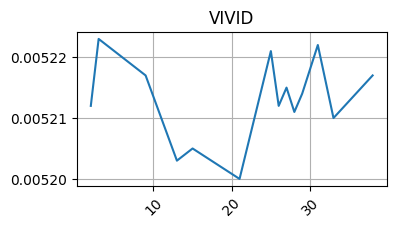

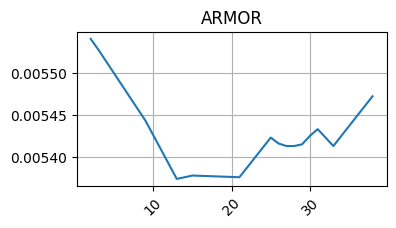

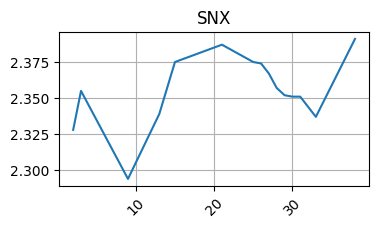

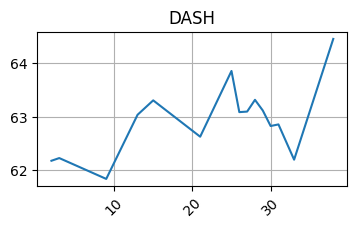

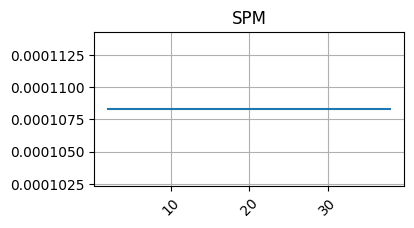

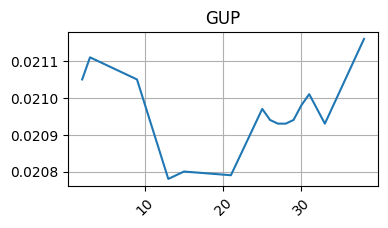

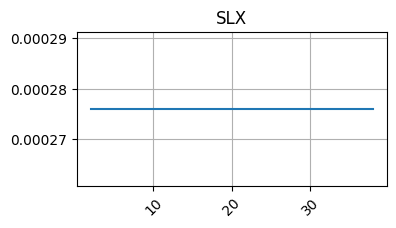

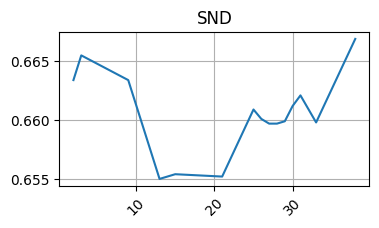

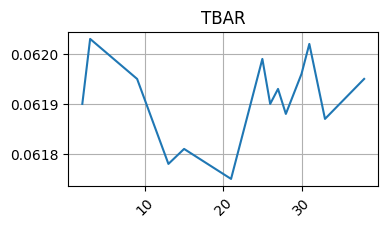

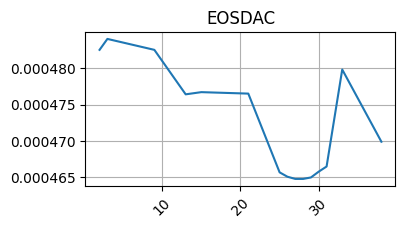

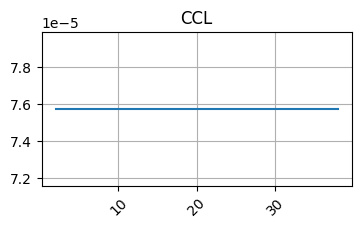

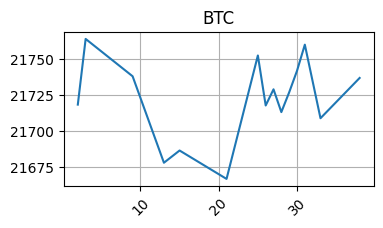

                          Cluster number: 1


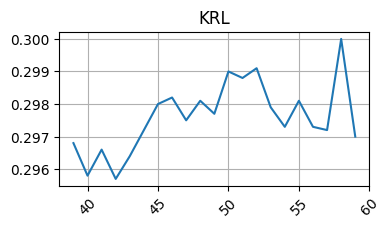

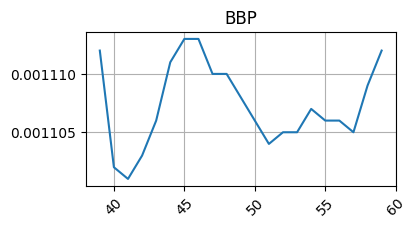

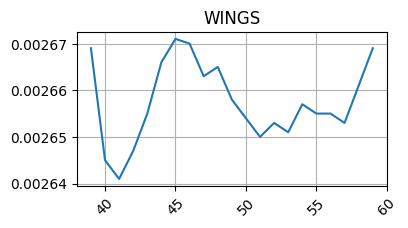

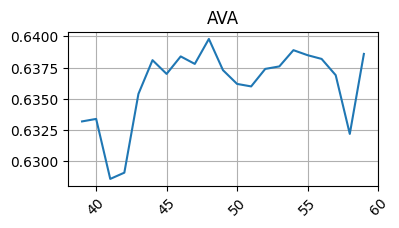

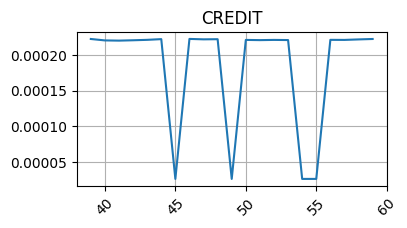

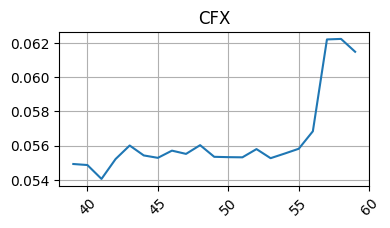

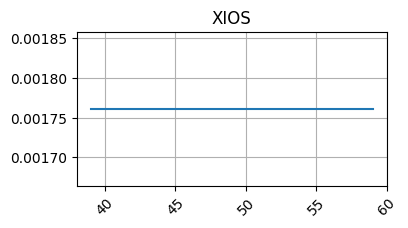

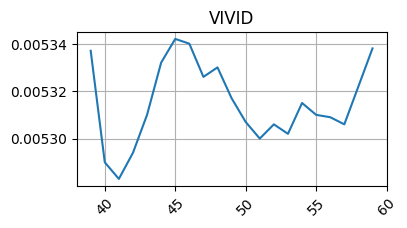

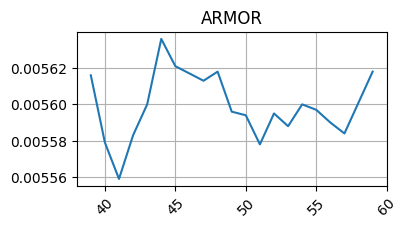

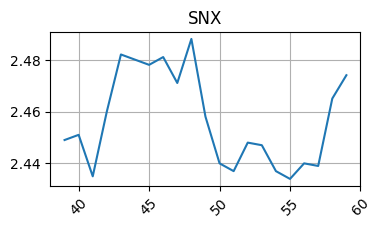

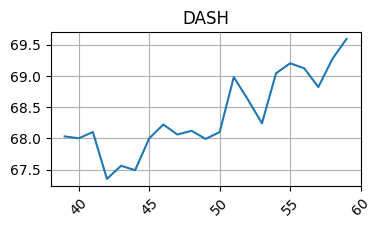

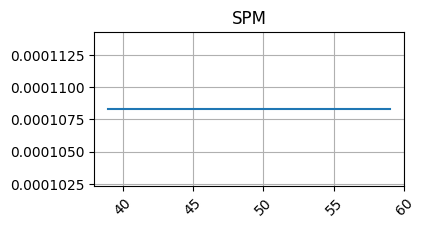

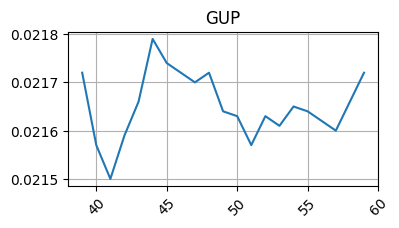

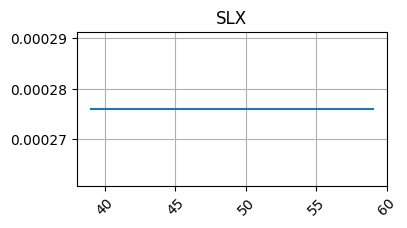

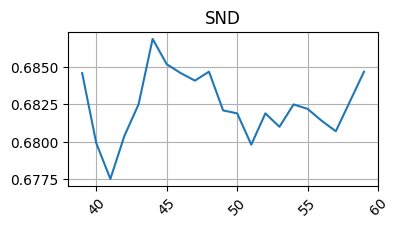

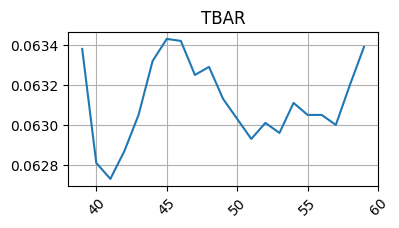

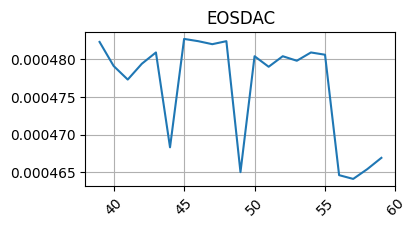

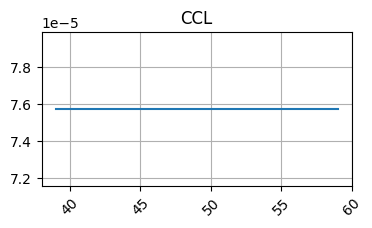

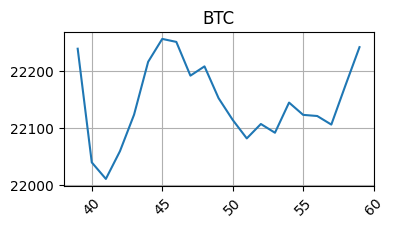

                          Cluster number: 2


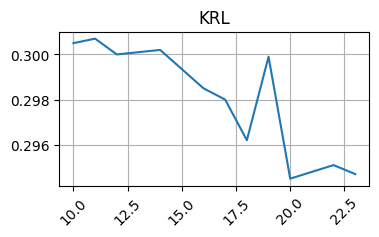

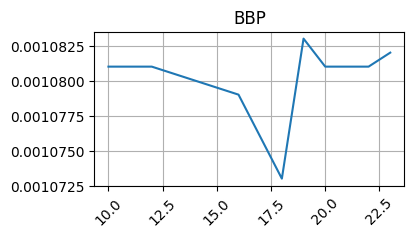

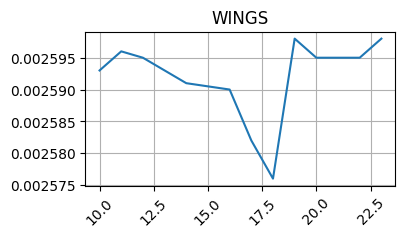

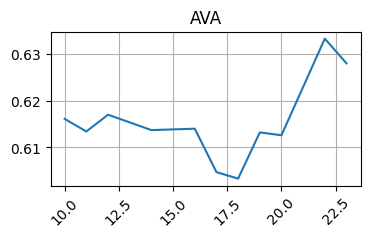

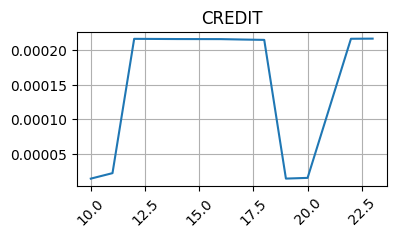

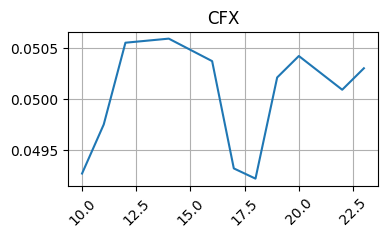

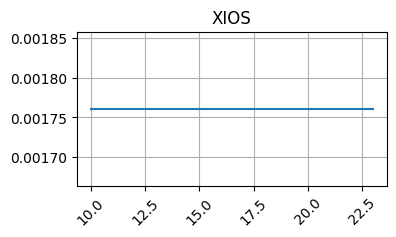

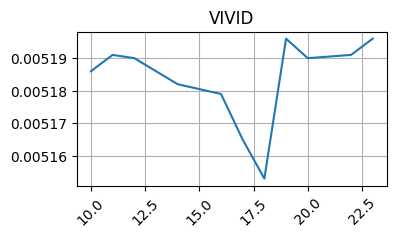

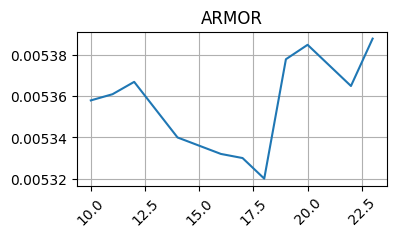

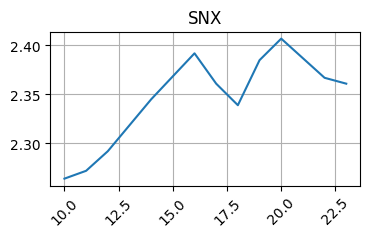

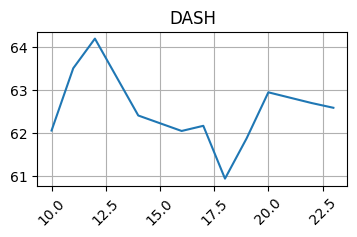

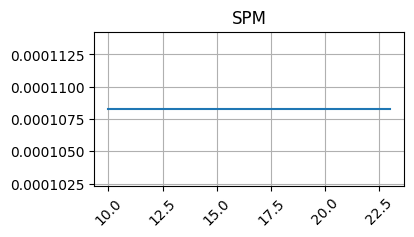

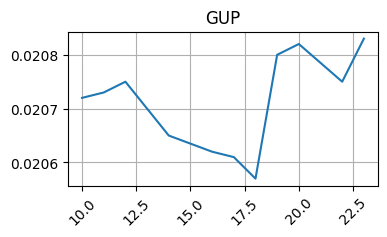

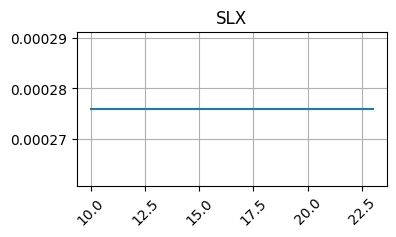

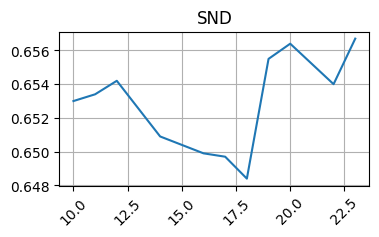

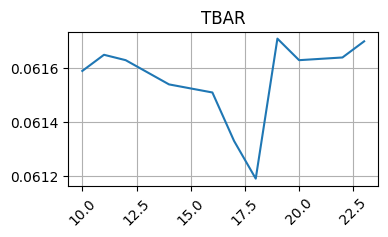

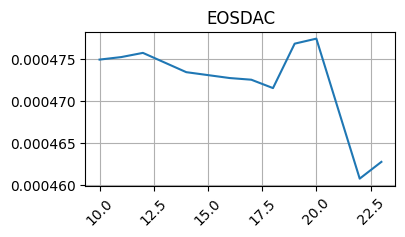

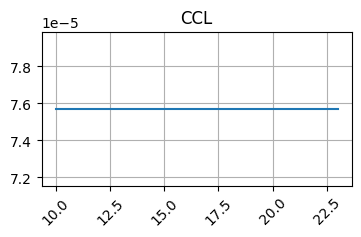

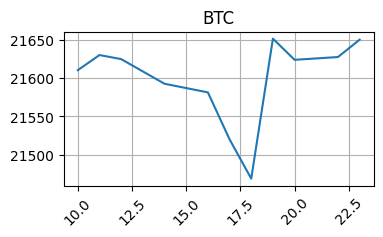

                          Cluster number: 3


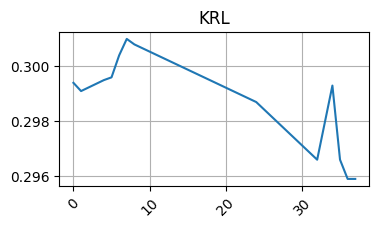

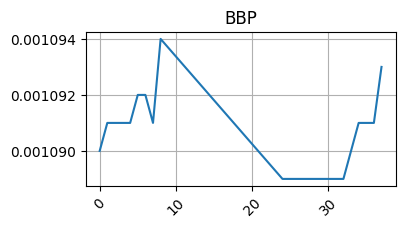

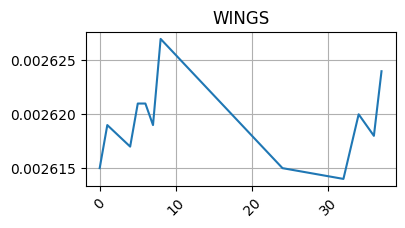

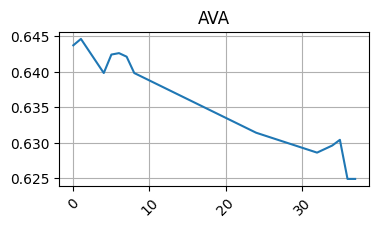

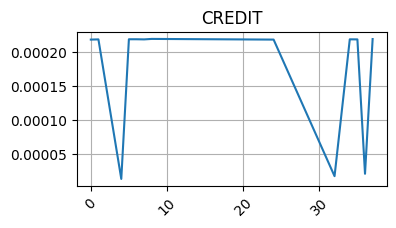

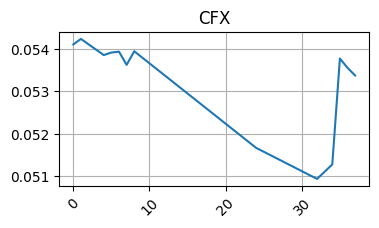

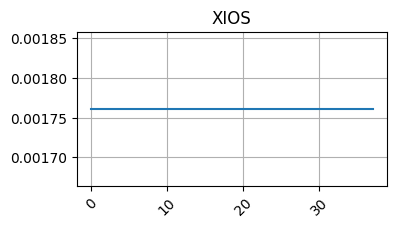

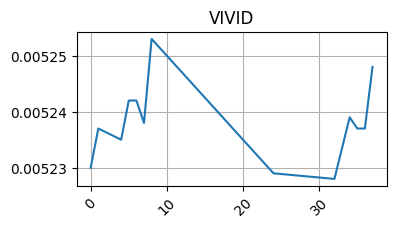

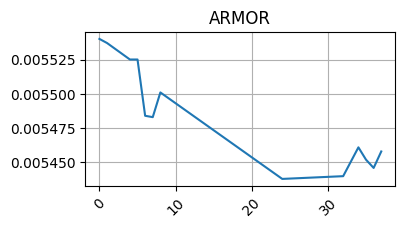

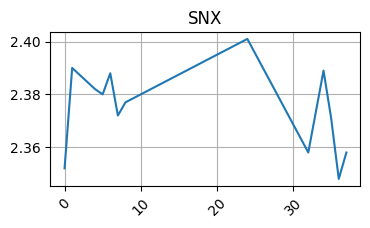

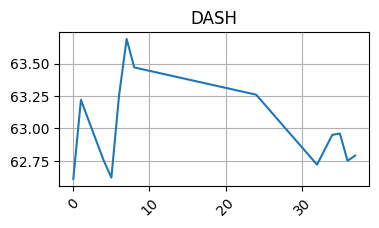

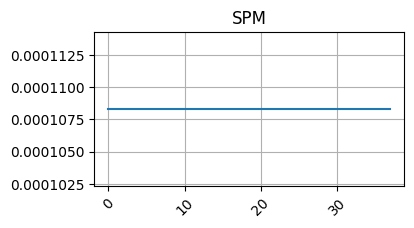

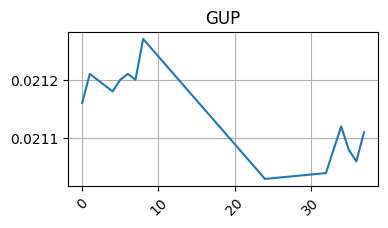

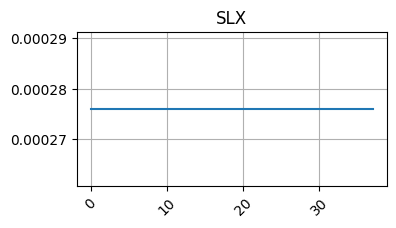

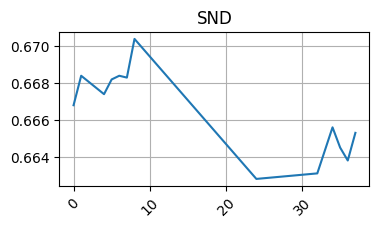

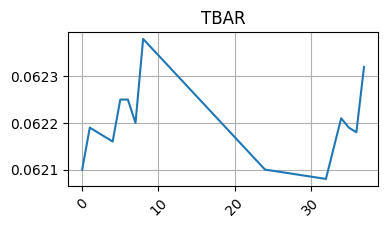

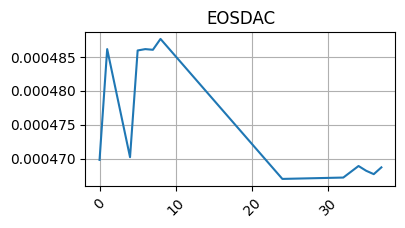

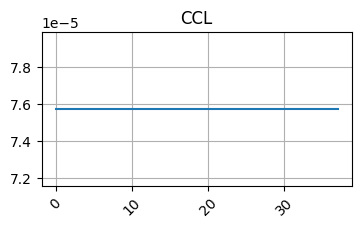

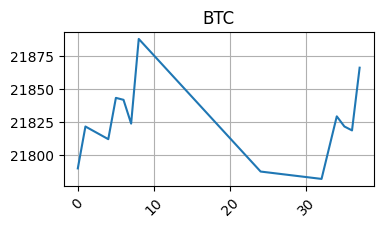

In [47]:
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")

    df_cluster = data[data.cluster==cluster]
    
    for i in range(len(data.columns)):
        if data.columns[i] != 'cluster':
            plt.figure(figsize=(4,2))
            plt.plot(df_cluster[data.columns[i]])
            plt.xticks(rotation=45)
            plt.title(data.columns[i])
            plt.grid(True)
            plt.show()